# 야놀자 숙박 데이터

## 데이터 처리 과정별 프레임
* df_main: 야놀자 숙박 데이터 수집 완료한 원본 데이터
* df_main_1: 데이터 전처리 (기본 정제)
    - 데이터 타입 변경
    - 누락값 처리
    - 소수점 처리
    - 판매비율 이상치 확인 및 정제
* df_main_2: 변수 선정 및 파생변수 생성
    - 파생변수 생성
    - 불필요한 열 삭제
    - 컬럼 순서 변경
    - 체크인·체크아웃 표준시간대 범주형 변수 생성

## 데이터 개요

- 8월 성수기 기준 야놀자 숙박 데이터를 웹크롤링을 통해 수집  
- 한계점: 숙박업소의 잦은 가격 변경으로 주중·주말 판매가격 변동 발생  
- 그 결과 판매가 비율 오류와 데이터 불일치 문제 확인  
- 해당 부분은 일정 부분 감안하여 분석 및 정제 진행 예정 

In [225]:
# 데이터 로드
import pandas as pd
import datetime

df_main = pd.read_csv("0821_메인프레임v10_감성별점추가.csv")

### 데이터 크기

In [226]:
df_main.shape

(20767, 25)

- 야놀자 숙박 데이터는 총 25개 컬럼과 20,767개 행으로 구성되어 있다.

### 컬럼별 데이터 타입 및 결측치 현황

In [227]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20767 entries, 0 to 20766
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   숙소ID            20767 non-null  int64  
 1   숙소명             20767 non-null  object 
 2   숙소유형코드          20767 non-null  int64  
 3   숙소운영형태          20767 non-null  object 
 4   우편번호            20767 non-null  int64  
 5   도로명주소           20767 non-null  object 
 6   위도              20767 non-null  float64
 7   경도              20767 non-null  float64
 8   체크인시간           20767 non-null  object 
 9   체크아웃시간          20767 non-null  object 
 10  숙소 검색량(전체)      20767 non-null  object 
 11  상위 시도           20767 non-null  object 
 12  하위 시구           20767 non-null  object 
 13  지역별_관심도         20767 non-null  float64
 14  유튜브_상위20_평균조회수  20767 non-null  int64  
 15  별점              20767 non-null  float64
 16  주중판매가           20767 non-null  float64
 17  주말판매가           20767 non-null 

- 데이터 타입별 구성
    - float64: 9개 컬럼 -> (위도, 경도, 지역별_관심도, 별점, 주중판매가, 주말판매가, 판매가비율, 감성별점, 종합평균점수)  
    - int64: 6개 컬럼 -> (숙소ID, 숙소유형코드, 우편번호, 유튜브_상위20_평균조회수, 최초리뷰연도, 최초리뷰월)
    - object(문자열/날짜 등): 10개 컬럼 -> (숙소명, 숙소유형, 숙소운영형태, 도로명주소, 체크인시간, 체크아웃시간, 숙소 검색량(전체), 상위 시도, 하위 시구, 최초리뷰일자)

- 결측치 현황
    - 전체 25개 컬럼 중 23개는 결측치 없음 (20767개 모두 값 존재)
    - 감성별점, 종합평균점수 → 19405개 (약 2,362개 결측치 존재)
    


## 데이터 전처리 (기본 정제)

In [228]:
# 데이터 전처리 전 복사본 생성
df_main_1 = df_main.copy()

- 숙소 ID 중복 확인

In [229]:
# 숙소ID 중복 확인
df_main_1[df_main_1.duplicated(['숙소ID'], keep=False)]

,숙소ID,숙소명,숙소유형코드,숙소운영형태,우편번호,도로명주소,위도,경도,체크인시간,체크아웃시간,...,별점,주중판매가,주말판매가,판매가비율,리뷰수,최초리뷰일자,감성별점,종합평균점수,최초리뷰연도,최초리뷰월


- 중복되는 숙소는 없음

### 데이터 타입 변경
- **판매가 컬럼 -> int형**
    - 주중판매가, 주말판매가: 가격은 정수형으로 처리하는 것이 적합 
- **ID/코드 컬럼 -> object형**
    - 숙소ID, 숙소유형코드: 숫자이지만 범주형 데이터이므로 문자열(object)로 변환
- **검색량/리뷰수 컬럼 -> 문자열 -> 쉼표 제거 -> int형**  
    - 숙소 검색량(전체), 리뷰수: 원본에 쉼표(,)가 포함되어 있어 직접 변환 불가 → 문자열로 변환 후 쉼표 제거 후 int로 변환  

In [230]:
df_main_1['주중판매가'] = df_main_1['주중판매가'].astype(int)
df_main_1['주말판매가'] = df_main_1['주말판매가'].astype(int)
df_main_1['숙소ID'] = df_main_1['숙소ID'].astype(object)
df_main_1['숙소유형코드'] = df_main_1['숙소유형코드'].astype(object)

In [231]:
df_main_1['숙소 검색량(전체)'] = (
    df_main_1['숙소 검색량(전체)']
    .astype(str)              # 문자열로 변환
    .str.replace(',', '')     # 천 단위 구분 쉼표 제거
    .astype(int)              # int 변환
)

df_main_1['리뷰수'] = (
    df_main_1['리뷰수']
    .astype(str)              # 문자열로 변환
    .str.replace(',', '')     # 천 단위 구분 쉼표 제거
    .astype(int)              # int 변환
)


### 누락값 처리
- 리뷰 데이터 크롤링 과정에서 일부 숙소 ID의 리뷰가 누락됨  
- 누락된 숙소 ID를 다시 크롤링하기에는 현실적인 제약이 있어, 결측값 보정 대신 해당 행을 삭제하는 방식으로 정제  
- 삭제된 데이터는 전체 데이터셋 대비 비율이 크지 않아 분석 결과에 큰 영향을 주지 않음  

In [232]:
# 감성별점 과 종합평균점수가 NaN인 경우는 삭제
df_main_1 = df_main_1[~(df_main_1['감성별점'].isna() | df_main_1['종합평균점수'].isna())]

In [233]:
df_main_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19405 entries, 0 to 20766
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   숙소ID            19405 non-null  object 
 1   숙소명             19405 non-null  object 
 2   숙소유형코드          19405 non-null  object 
 3   숙소운영형태          19405 non-null  object 
 4   우편번호            19405 non-null  int64  
 5   도로명주소           19405 non-null  object 
 6   위도              19405 non-null  float64
 7   경도              19405 non-null  float64
 8   체크인시간           19405 non-null  object 
 9   체크아웃시간          19405 non-null  object 
 10  숙소 검색량(전체)      19405 non-null  int64  
 11  상위 시도           19405 non-null  object 
 12  하위 시구           19405 non-null  object 
 13  지역별_관심도         19405 non-null  float64
 14  유튜브_상위20_평균조회수  19405 non-null  int64  
 15  별점              19405 non-null  float64
 16  주중판매가           19405 non-null  int64  
 17  주말판매가           19405 non-null  int6

### 소수점 처리

In [234]:
# float인 열만 출력
df_main_1.select_dtypes(include=['float64']).head()

,위도,경도,지역별_관심도,별점,판매가비율,감성별점,종합평균점수
0,37.517182,126.911217,3.057270,4.7,1.69,3.1,3.9
1,36.713884,127.439228,2.802088,4.6,0.91,3.8,4.2
2,37.498792,127.033956,3.057270,4.2,2.00,2.9,3.5
3,36.356873,127.349172,2.918471,4.7,1.50,4.1,4.4
4,37.500706,127.039849,3.057270,4.8,2.27,3.0,3.9


- 판매가비율, 지역별_관심도 소수점 한자리로 반올림

In [235]:
# 판매가비율 소수점 한자리로 반올림
df_main_1['판매가비율'] = df_main_1['판매가비율'].round(1)
# 지역별_관심도 소수점 한자리로 반올림
df_main_1['지역별_관심도'] = df_main_1['지역별_관심도'].round(1)

In [236]:
df_main_1.describe()

,우편번호,위도,경도,숙소 검색량(전체),지역별_관심도,유튜브_상위20_평균조회수,별점,주중판매가,주말판매가,판매가비율,리뷰수,감성별점,종합평균점수,최초리뷰연도,최초리뷰월
count,19405.000000,19405.000000,19405.000000,19405.000000,19405.000000,1.940500e+04,19405.000000,1.940500e+04,1.940500e+04,19405.000000,19405.000000,19405.000000,19405.000000,19405.000000,19405.000000
mean,35559.525483,36.288378,127.717636,449.242979,2.944674,3.722745e+05,4.550435,1.142842e+05,1.761222e+05,1.619402,607.845143,4.191909,4.371538,2021.377428,6.978253
std,17568.810409,1.328648,0.992146,3049.390899,0.180921,3.862068e+05,0.620595,1.135386e+05,1.669751e+05,0.701309,1383.687589,0.595336,0.512485,2.504003,3.381766
min,0.000000,33.209238,124.708279,20.000000,2.700000,4.966000e+04,1.000000,8.000000e+03,8.000000e+03,0.100000,1.000000,1.000000,1.000000,2017.000000,1.000000
25%,23062.000000,35.196858,126.886757,20.000000,2.800000,1.319450e+05,4.400000,5.000000e+04,7.000000e+04,1.200000,16.000000,3.800000,4.100000,2019.000000,4.000000
50%,34125.000000,36.410224,127.510102,30.000000,2.900000,2.460000e+05,4.700000,7.600000e+04,1.250000e+05,1.400000,81.000000,4.200000,4.400000,2022.000000,7.000000
75%,52435.000000,37.508858,128.626284,130.000000,3.100000,4.036150e+05,4.900000,1.326000e+05,2.190000e+05,1.900000,498.000000,4.700000,4.700000,2024.000000,10.000000
max,63643.000000,38.537820,130.912016,138900.000000,3.300000,1.606000e+06,5.000000,2.000000e+06,2.100000e+06,28.600000,20443.000000,5.000000,5.000000,2025.000000,12.000000


In [237]:
# 판매가비율 28.57인행 출력
df_main_1[df_main_1['판매가비율'] == 28.57]

,숙소ID,숙소명,숙소유형코드,숙소운영형태,우편번호,도로명주소,위도,경도,체크인시간,체크아웃시간,...,별점,주중판매가,주말판매가,판매가비율,리뷰수,최초리뷰일자,감성별점,종합평균점수,최초리뷰연도,최초리뷰월


In [238]:
# 숙소ID(3002203) 주중판매가, 주말판매가 오류 수정
df_main_1.loc[df_main_1['숙소ID'] == 3002203, '주중판매가'] = 28000
df_main_1.loc[df_main_1['숙소ID'] == 3002203, '주말판매가'] = 60000

In [239]:
# 숙소ID(3002203)인 행만 출력
df_main_1[df_main_1['숙소ID'] == 3002203]

,숙소ID,숙소명,숙소유형코드,숙소운영형태,우편번호,도로명주소,위도,경도,체크인시간,체크아웃시간,...,별점,주중판매가,주말판매가,판매가비율,리뷰수,최초리뷰일자,감성별점,종합평균점수,최초리뷰연도,최초리뷰월
3598,3002203,수원(영화동)달빛여관,1,Motel,16269,경기도 수원시 장안구 팔달로271번길 8 (영화동),37.289984,127.014476,23:00,10:00,...,4.9,28000,60000,28.6,1779,2017-10-24,3.6,4.3,2017,10


- 판매가 비율에서 이상치 확인 
- 숙소ID (3002203) -> 주중판매가, 주말판매가 오류로 수정
- 주중판매가, 주말판매가 수정 후 판매가비율 수정

In [240]:
# 판매가 비율이 14 인 행 출력
df_main_1[df_main_1['판매가비율'] == 14]

,숙소ID,숙소명,숙소유형코드,숙소운영형태,우편번호,도로명주소,위도,경도,체크인시간,체크아웃시간,...,별점,주중판매가,주말판매가,판매가비율,리뷰수,최초리뷰일자,감성별점,종합평균점수,최초리뷰연도,최초리뷰월
17581,1000100673,가평실로암펜션(단체),3,Pension,12457,경기도 가평군 청평면 모꼬지로90,37.684991,127.371082,15:00,11:00,...,4.8,86000,1200000,14.0,223,2020-08-09,4.2,4.5,2020,8


In [241]:
# 판매가 비율 이상치 확인
df_main_1[df_main_1['판매가비율'] > 10]

,숙소ID,숙소명,숙소유형코드,숙소운영형태,우편번호,도로명주소,위도,경도,체크인시간,체크아웃시간,...,별점,주중판매가,주말판매가,판매가비율,리뷰수,최초리뷰일자,감성별점,종합평균점수,최초리뷰연도,최초리뷰월
2523,1019684,잠실HOTEL2.4,1,Motel,5545,서울특별시 송파구 오금로11길 55-16 (방이동),37.515742,127.113880,22:00,12:00,...,4.3,80000,995000,12.4,231,2024-01-07,3.6,4.0,2024,1
3598,3002203,수원(영화동)달빛여관,1,Motel,16269,경기도 수원시 장안구 팔달로271번길 8 (영화동),37.289984,127.014476,23:00,10:00,...,4.9,28000,60000,28.6,1779,2017-10-24,3.6,4.3,2017,10
5752,3011146,용산하우재게스트하우스,4,GuestHouse,4382,서울특별시 용산구 한강대로62나길 11 (한강로1가),37.534414,126.974261,15:00,11:00,...,4.0,40000,500000,12.5,240,2017-12-01,3.8,3.9,2017,12
7330,3016042,고성오션투유리조트설악비치호텔앤콘도,1,Motel,24750,강원도 고성군 죽왕면 삼포해변길 9,38.317002,128.530977,15:00,11:00,...,5.0,49900,539990,10.8,1548,2019-01-21,3.6,4.3,2019,1
13415,10053055,태안푸른정원펜션,3,Pension,32166,충청남도 태안군 안면읍 꽃지2길 37,36.492842,126.338856,15:00,11:00,...,4.3,99000,1000000,10.1,4,2024-04-29,4.8,4.5,2024,4
17581,1000100673,가평실로암펜션(단체),3,Pension,12457,경기도 가평군 청평면 모꼬지로90,37.684991,127.371082,15:00,11:00,...,4.8,86000,1200000,14.0,223,2020-08-09,4.2,4.5,2020,8


- 판매가 비율이 10을 초과하는 경우를 오류로 판단하고, 주중·주말 가격을 확인하여 수정

- 주중,주말 가격 오류인 숙소ID
    - 1019684, 3016042, 1000100673

In [242]:
# 주중, 주말 판매가 수정
df_main_1.loc[df_main_1['숙소ID'] == 3016042, '주중판매가'] = 199900
df_main_1.loc[df_main_1['숙소ID'] == 3016042, '주말판매가'] = 549990

df_main_1.loc[df_main_1['숙소ID'] == 1000100673, '주말판매가'] = 90000
df_main_1.loc[df_main_1['숙소ID'] == 1019684, '주말판매가'] = 175000


In [243]:
# 판매가비율 재계산
df_main_1['판매가비율'] = df_main_1['주말판매가'] / df_main_1['주중판매가']
df_main_1['판매가비율'] = df_main_1['판매가비율'].round(1)

- 컬럼명 오류로 수정

In [244]:
# 컬럼명 변경
df_main_1.rename(columns={
    '유튜브_상위20_평균조회수': '지역별_유튜브Top20_평균조회수',
}, inplace=True)

In [245]:
# 수정된 데이터 저장
df_main_1.to_csv("0821_메인프레임v11.csv", index=False)  

### 판매비율 이상치 확인 및 정제

In [246]:
df_main_1.describe()

,우편번호,위도,경도,숙소 검색량(전체),지역별_관심도,지역별_유튜브Top20_평균조회수,별점,주중판매가,주말판매가,판매가비율,리뷰수,감성별점,종합평균점수,최초리뷰연도,최초리뷰월
count,19405.000000,19405.000000,19405.000000,19405.000000,19405.000000,1.940500e+04,19405.000000,1.940500e+04,1.940500e+04,19405.000000,19405.000000,19405.000000,19405.000000,19405.000000,19405.000000
mean,35559.525483,36.288378,127.717636,449.242979,2.944674,3.722745e+05,4.550435,1.142915e+05,1.759749e+05,1.616841,607.845143,4.191909,4.371538,2021.377428,6.978253
std,17568.810409,1.328648,0.992146,3049.390899,0.180921,3.862068e+05,0.620595,1.135395e+05,1.666090e+05,0.660615,1383.687589,0.595336,0.512485,2.504003,3.381766
min,0.000000,33.209238,124.708279,20.000000,2.700000,4.966000e+04,1.000000,8.000000e+03,8.000000e+03,0.100000,1.000000,1.000000,1.000000,2017.000000,1.000000
25%,23062.000000,35.196858,126.886757,20.000000,2.800000,1.319450e+05,4.400000,5.000000e+04,7.000000e+04,1.200000,16.000000,3.800000,4.100000,2019.000000,4.000000
50%,34125.000000,36.410224,127.510102,30.000000,2.900000,2.460000e+05,4.700000,7.600000e+04,1.250000e+05,1.500000,81.000000,4.200000,4.400000,2022.000000,7.000000
75%,52435.000000,37.508858,128.626284,130.000000,3.100000,4.036150e+05,4.900000,1.328700e+05,2.190000e+05,1.900000,498.000000,4.700000,4.700000,2024.000000,10.000000
max,63643.000000,38.537820,130.912016,138900.000000,3.300000,1.606000e+06,5.000000,2.000000e+06,2.100000e+06,12.500000,20443.000000,5.000000,5.000000,2025.000000,12.000000


In [247]:
# 판매가 비율이 0.1행 출력
df_main_1[df_main_1['판매가비율'] == 0.1]

,숙소ID,숙소명,숙소유형코드,숙소운영형태,우편번호,도로명주소,위도,경도,체크인시간,체크아웃시간,...,별점,주중판매가,주말판매가,판매가비율,리뷰수,최초리뷰일자,감성별점,종합평균점수,최초리뷰연도,최초리뷰월
7141,3015481,대구2월호텔수성점,1,Motel,42155,대구광역시 수성구 청수로 67 (중동),35.840874,128.615555,15:00,12:00,...,4.8,900000,127000,0.1,659,2020-03-17,3.9,4.3,2020,3


- 판매가 비율 확인 결과, 숙소 ID 3015481은 오류 및 숙소 등록 해제로 인해 삭제

In [248]:
# 숙소ID(3015481)인행 삭제
df_main_1 = df_main_1[df_main_1['숙소ID'] != 3015481]

In [249]:
df_main_1.to_csv("0821_메인프레임v12.csv", index=False)

In [250]:
df_main_1.head()

,숙소ID,숙소명,숙소유형코드,숙소운영형태,우편번호,도로명주소,위도,경도,체크인시간,체크아웃시간,...,별점,주중판매가,주말판매가,판매가비율,리뷰수,최초리뷰일자,감성별점,종합평균점수,최초리뷰연도,최초리뷰월
0,23184,영등포라이프스타일FHOTEL,1,Motel,7306,서울 영등포구 경인로108길 8 (영등포동1가),37.517182,126.911217,23:00,12:00,...,4.7,65000,110000,1.7,3202,2017-11-16,3.1,3.9,2017,11
1,23192,청주오창M+,1,Motel,28118,충청북도 청주시 청원구 오창읍 양청송대길 9-12,36.713884,127.439228,18:00,12:00,...,4.6,55000,50000,0.9,670,2017-12-02,3.8,4.2,2017,12
2,23197,강남렉시,1,Motel,6235,서울특별시 강남구 테헤란로16길 11,37.498792,127.033956,23:00,13:00,...,4.2,60000,120000,2.0,9275,2017-10-18,2.9,3.5,2017,10
3,23204,대전유성시나브로,1,Motel,34185,대전광역시 유성구 온천북로59번길 9,36.356873,127.349172,17:00,13:00,...,4.7,60000,90000,1.5,245,2017-12-09,4.1,4.4,2017,12
4,23207,역삼벤,1,Motel,6220,서울 강남구 언주로87길 41 (역삼동),37.500706,127.039849,23:00,12:00,...,4.8,55000,125000,2.3,10124,2017-10-23,3.0,3.9,2017,10


- 주말판매가 재크롤링 데이터 프레임 로드

In [251]:
df_주말판매가오류 = pd.read_csv("0814야놀자_주말판매가크롤링_v2.csv")
df_주말판매가오류

,숙소ID,주말판매가
0,1016034,130000
1,3000435,80000
2,3000742,216810
3,3000750,415000
4,3000769,338580
...,...,...
221,1000113721,160000
222,1000114028,340000
223,1000114042,1000000
224,1000114223,360000


In [252]:
df_주말판매가오류.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   숙소ID    226 non-null    int64
 1   주말판매가   226 non-null    int64
dtypes: int64(2)
memory usage: 3.7 KB


- 주말판매가오류 데이터프레임과 메인데이터프레임 매핑

In [253]:
tmp = (df_주말판매가오류[['숙소ID','주말판매가']]
       .dropna(subset=['주말판매가'])
       .drop_duplicates('숙소ID', keep='last'))
tmp['숙소ID'] = tmp['숙소ID'].astype(str)

df_main_1['숙소ID'] = df_main_1['숙소ID'].astype(str)
df_main_1 = df_main_1.merge(tmp, on='숙소ID', how='left', suffixes=('','_수정'))

# 덮어쓰기
df_main_1['주말판매가'] = df_main_1['주말판매가_수정'].combine_first(df_main_1['주말판매가'])
df_main_1.drop(columns=['주말판매가_수정'], inplace=True)

# 숫자형 변환 후 일반 int로 캐스팅
df_main_1['주말판매가'] = pd.to_numeric(df_main_1['주말판매가'], errors='coerce').astype(int)


In [254]:
df_main_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   숙소ID                19404 non-null  object 
 1   숙소명                 19404 non-null  object 
 2   숙소유형코드              19404 non-null  object 
 3   숙소운영형태              19404 non-null  object 
 4   우편번호                19404 non-null  int64  
 5   도로명주소               19404 non-null  object 
 6   위도                  19404 non-null  float64
 7   경도                  19404 non-null  float64
 8   체크인시간               19404 non-null  object 
 9   체크아웃시간              19404 non-null  object 
 10  숙소 검색량(전체)          19404 non-null  int64  
 11  상위 시도               19404 non-null  object 
 12  하위 시구               19404 non-null  object 
 13  지역별_관심도             19404 non-null  float64
 14  지역별_유튜브Top20_평균조회수  19404 non-null  int64  
 15  별점                  19404 non-null  float64
 16  주중판매

## 변수 선정 및 파생변수 생성

In [255]:
# 변수 선정 및 파생변수 생성 전 복사본 생성
df_main_2 = df_main_1.copy()

In [256]:
df_main_2.to_csv('0821_메인프레임v13.csv', index=False)

In [257]:
df_main_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   숙소ID                19404 non-null  object 
 1   숙소명                 19404 non-null  object 
 2   숙소유형코드              19404 non-null  object 
 3   숙소운영형태              19404 non-null  object 
 4   우편번호                19404 non-null  int64  
 5   도로명주소               19404 non-null  object 
 6   위도                  19404 non-null  float64
 7   경도                  19404 non-null  float64
 8   체크인시간               19404 non-null  object 
 9   체크아웃시간              19404 non-null  object 
 10  숙소 검색량(전체)          19404 non-null  int64  
 11  상위 시도               19404 non-null  object 
 12  하위 시구               19404 non-null  object 
 13  지역별_관심도             19404 non-null  float64
 14  지역별_유튜브Top20_평균조회수  19404 non-null  int64  
 15  별점                  19404 non-null  float64
 16  주중판매

### 파생변수 생성 후 열 삭제
  - 최초리뷰일자: 운영개월수, 월평균리뷰수 등 파생변수를 생성한 후 분석에서는 제외

### 불필요한 열 삭제
- 분석 목적과 직접적인 관련이 없는 컬럼을 제거하여 데이터셋을 단순화함
- **삭제 대상 컬럼**  
  - 최초리뷰월: 단순히 리뷰가 처음 달린 월에 불과하여 분석적 의미가 없어 삭제
  - 숙소유형코드: 숙소운영형태와 동일한 정보를 나타냄으로 삭제
  - 우편번호: 주소 정보는 분석 목적과 크게 관련이 없어 삭제 
  - 도로명주소: 텍스트 데이터로 활용성이 낮고, 지역 비교는 상위시도·하위시구 변수로 충분함
  - 위도.경도: 숙소별 고유값으로 지역 구분은 상위시도·하위시구로 대체 가능하므로 삭제

In [258]:
# 파생변수 생성: 운영개월수, 월평균리뷰수
import pandas as pd
import numpy as np

# 0) '최초리뷰일자'를 날짜로, '리뷰수'를 숫자로 바꿔둠
df_main_2['최초리뷰일자'] = pd.to_datetime(df_main_2['최초리뷰일자'], errors='coerce')
df_main_2['리뷰수'] = pd.to_numeric(df_main_2['리뷰수'], errors='coerce').fillna(0).astype(int)

# 1) 기준일 = 리뷰 수집 완료일 (2025-08-20)
기준일 = pd.Timestamp("2025-08-20")

# 2) 날짜에서 '연'과 '월'만 뽑기
y = df_main_2['최초리뷰일자'].dt.year
m = df_main_2['최초리뷰일자'].dt.month

# 3) '연*12 + 월'로 바꿔서 개월 차이 구하기
months = (기준일.year - y) * 12 + (기준일.month - m)

# 4) NaT → 1, 음수/0도 최소 1개월로 보정
df_main_2['운영개월수'] = pd.to_numeric(months, errors='coerce').fillna(1)
df_main_2['운영개월수'] = df_main_2['운영개월수'].clip(lower=1).astype(int)

# 5) 월 평균 리뷰수 = 리뷰수 / 운영개월수 (소수점 1자리로 반올림)
df_main_2['월평균리뷰수'] = (df_main_2['리뷰수'] / df_main_2['운영개월수']).round(1)

In [259]:
# 필요 없는 컬럼 삭제
df_main_2 = df_main_2.drop(columns=['최초리뷰일자','최초리뷰월','숙소유형코드','우편번호','도로명주소','위도','경도'])

In [260]:
df_main_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   숙소ID                19404 non-null  object 
 1   숙소명                 19404 non-null  object 
 2   숙소운영형태              19404 non-null  object 
 3   체크인시간               19404 non-null  object 
 4   체크아웃시간              19404 non-null  object 
 5   숙소 검색량(전체)          19404 non-null  int64  
 6   상위 시도               19404 non-null  object 
 7   하위 시구               19404 non-null  object 
 8   지역별_관심도             19404 non-null  float64
 9   지역별_유튜브Top20_평균조회수  19404 non-null  int64  
 10  별점                  19404 non-null  float64
 11  주중판매가               19404 non-null  int64  
 12  주말판매가               19404 non-null  int64  
 13  판매가비율               19404 non-null  float64
 14  리뷰수                 19404 non-null  int64  
 15  감성별점                19404 non-null  float64
 16  종합평균

### 컬럼 순서 변경

In [261]:
# 컬럼 출력
df_main_2.columns

Index(['숙소ID', '숙소명', '숙소운영형태', '체크인시간', '체크아웃시간', '숙소 검색량(전체)', '상위 시도',
       '하위 시구', '지역별_관심도', '지역별_유튜브Top20_평균조회수', '별점', '주중판매가', '주말판매가',
       '판매가비율', '리뷰수', '감성별점', '종합평균점수', '최초리뷰연도', '운영개월수', '월평균리뷰수'],
      dtype='object')

In [262]:
df_main_2 = df_main_2[['숙소ID','숙소명','숙소운영형태','상위 시도','하위 시구','체크인시간','체크아웃시간',
                       '주중판매가','주말판매가','판매가비율',
                       '최초리뷰연도','운영개월수',
                       '리뷰수','월평균리뷰수',
                       '별점','감성별점','종합평균점수',
                       '숙소 검색량(전체)','지역별_관심도','지역별_유튜브Top20_평균조회수']]

In [263]:
df_main_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   숙소ID                19404 non-null  object 
 1   숙소명                 19404 non-null  object 
 2   숙소운영형태              19404 non-null  object 
 3   상위 시도               19404 non-null  object 
 4   하위 시구               19404 non-null  object 
 5   체크인시간               19404 non-null  object 
 6   체크아웃시간              19404 non-null  object 
 7   주중판매가               19404 non-null  int64  
 8   주말판매가               19404 non-null  int64  
 9   판매가비율               19404 non-null  float64
 10  최초리뷰연도              19404 non-null  int64  
 11  운영개월수               19404 non-null  int64  
 12  리뷰수                 19404 non-null  int64  
 13  월평균리뷰수              19404 non-null  float64
 14  별점                  19404 non-null  float64
 15  감성별점                19404 non-null  float64
 16  종합평균

## EDA

### 기초 통계 describe()

In [264]:
df_main_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   숙소ID                19404 non-null  object 
 1   숙소명                 19404 non-null  object 
 2   숙소운영형태              19404 non-null  object 
 3   상위 시도               19404 non-null  object 
 4   하위 시구               19404 non-null  object 
 5   체크인시간               19404 non-null  object 
 6   체크아웃시간              19404 non-null  object 
 7   주중판매가               19404 non-null  int64  
 8   주말판매가               19404 non-null  int64  
 9   판매가비율               19404 non-null  float64
 10  최초리뷰연도              19404 non-null  int64  
 11  운영개월수               19404 non-null  int64  
 12  리뷰수                 19404 non-null  int64  
 13  월평균리뷰수              19404 non-null  float64
 14  별점                  19404 non-null  float64
 15  감성별점                19404 non-null  float64
 16  종합평균

#### 수치형

In [265]:
df_main_2.describe()

,주중판매가,주말판매가,판매가비율,최초리뷰연도,운영개월수,리뷰수,월평균리뷰수,별점,감성별점,종합평균점수,숙소 검색량(전체),지역별_관심도,지역별_유튜브Top20_평균조회수
count,1.940400e+04,1.940400e+04,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,1.940400e+04
mean,1.142510e+05,1.765383e+05,1.616919,2021.377499,44.491548,607.842507,14.858967,4.550423,4.191924,4.371542,449.252731,2.944687,3.722859e+05
std,1.134023e+05,1.677451e+05,0.660542,2.504048,29.366223,1383.723196,83.560179,0.620609,0.595348,0.512498,3049.469176,0.180917,3.862135e+05
min,8.000000e+03,8.000000e+03,0.200000,2017.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,20.000000,2.700000,4.966000e+04
25%,5.000000e+04,7.000000e+04,1.200000,2019.000000,18.000000,16.000000,0.600000,4.400000,3.800000,4.100000,20.000000,2.800000,1.319450e+05
50%,7.600000e+04,1.250000e+05,1.500000,2022.000000,38.000000,81.000000,2.500000,4.700000,4.200000,4.400000,30.000000,2.900000,2.460000e+05
75%,1.326675e+05,2.190000e+05,1.900000,2024.000000,71.000000,498.000000,12.000000,4.900000,4.700000,4.700000,130.000000,3.100000,4.036150e+05
max,2.000000e+06,2.100000e+06,12.500000,2025.000000,94.000000,20443.000000,4998.000000,5.000000,5.000000,5.000000,138900.000000,3.300000,1.606000e+06


[기초 통계 분석]

* 주중판매가
    - 평균 114,251원, 중앙값 76,000원, 표준편차 113,403원, 최소 8,000원, 최대 2,000,000원
    - 숙소 간 가격 변동이 매우 크며, 일부 초고가 숙소가 평균을 크게 끌어올려 분포를 왜곡함
    - 최저가는 8,000원으로, 게스트하우스나 캠핑 등 저가 숙소일 가능성이 높음
    - 가장 비싼 주중 숙소는 200만원이며 고급리조트, 고급호텔, 풀빌라 등의 가능성이 있음
    - 절반의 숙소는 7만6천원 이하, 상위 25% 숙소는 13만원 이상
    - 가격 구간 차이가 커서 분포 왜도(skewness)가 큼

* 주말판매가 
    - 평균 176,538원, 중앙값 120,000원, 표준편차 167,745원, 최소 8,000원, 최대 2,100,000원
    - 주중보다 전반적으로 높으며, 변동 폭이 매우 큼
    - 사분위수 기준: 7만원 이하 ~ 21만원 이상
    - 초고가 숙소로 인한 이상치 존재 → 로그 변환 필요성 있음

* 판매가비율
    - 중앙값이 1.5 -> 전형적으로 주말이 주중보다 약 1.5배 비쌈
    - 평균(1.62)이 중앙값(1.5)보다 커 분포가 우측으로 치우쳐 있다.
    - 극단적으로 높은 값이 평균을 끌어올린 우측 편향 분포를 보인다.
    - 평균적으로는 주말 요금이 주중보다 높지만, 최솟값은 주말 요금이 더 낮게 나타나 데이터 오류 가능성이 있어 추가 확인이 필요

* 최초리뷰연도 (숙소 설립 시점의 간접 지표)
    - 최소값: 2017년, 최대값: 2025년 → 가장 오래된 숙소와 가장 최근 신설된 숙소 파악 가능
    - 평균: 약 2021년, 중앙값: 2022년 → 최근 3~4년 내 신설된 숙소 비중이 높음

* 운영개월수
    - 평균 44개월, 중앙값 38개월, 표준편차 29.4개월, 최소 1개월, 최대 94개월
    - 신규 숙소부터 8년 이상 운영된 숙소까지 분포
    - 최근 3~4년 내 개설된 숙소가 많아 중앙값이 평균보다 약간 낮음
    - 일부 장기 운영 숙소가 평균을 끌어올려 분포가 약간 우측으로 퍼짐

* 리뷰수
    - 최소 1개, 최대 20,443개 → 숙소별 리뷰수 격차가 매우 큼
    - 평균은 약 608개, 중앙값은 81개 → 상위 숙소에 리뷰가 집중되는 경향
    - 사분위 범위는 16개 ~ 498개 → 하위 숙소와 상위 숙소 간 리뷰 차이가 큼

* 월평균리뷰수
    - 평균 14.9개, 중앙값 2.5개, 표준편차 83.6개, 최소 0개, 최대 4,998개
    - 대부분 숙소는 월 5개 이하 수준이지만 일부 숙소는 수천 개에 달해 분포 차이가 매우 큼

* 별점 (사용자가 직접 준 점수 평균)
    - 평균: 4.55/ 중앙값: 4.7/ 사분위 범위: 4.4 ~ 4.9
    - 대부분 숙소가 4점 이상으로 평가되며, 전반적으로 고평가 경향이 강함. 낮은 별점 숙소는 소수.

* 감성별점 (리뷰 텍스트 기반 딥러닝 분석 점수)
    - 평균: 4.19 → 별점 평균(4.55)보다 0.36 낮음/ 중앙값: 4.2
    - 텍스트 분석 점수는 실제 별점보다 더 보수적이며, 리뷰 내용상 부정적 표현이 포함된 경우가 더 잘 반영됨

* 종합평균점수 (별점 + 감성별점의 평균)
    - 평균: 4.37/ 사분위 범위: 4.1 ~ 4.7
    - 별점과 감성별점의 중간값 역할. 실제 만족도를 균형 있게 반영한다고 볼 수 있음

* 숙소 검색량(전체)
    - 최소 20건, 최대 1,389,000건 → 검색량 차이가 극심함
    - 평균은 약 449건, 중앙값은 30건 → 상위 일부 숙소가 평균을 크게 끌어올림
    - 사분위 범위는 20건 ~ 130건 → 대부분 숙소 검색량은 낮은 수준

* 지역별_관심도
    - 평균은 2.94점으로 3점에 가까우며, 최소 2.7 ~ 최대 3.3 사이에서 큰 변동 없이 비슷한 수준
  
* 지역별_유튜브Top20_평균조회수
    - 각 지역의 상위 20개 유튜브 여행 영상 평균 조회수가 약 37만 회
    - 지역별 평균 조회수 편차가 큼 -> 일부 지역은 평균 조회수가 매우 높음
    - 가장 낮은 지역 평균 조회수는 49,660회
    - 하위25%와 상위75% 간 격차가 3배 이상.
    - 표준편차가 평균과 거의 비슷해 분산이 매우 큼 -> 지역별 조회수 차이가 극명.
    - 평균이 중앙값보디 높음 -> 우측 편향 가능성이 있음
    - 소수의 인기 지역(예:제주도, 부산 등)이 조회수를 끌어올림

#### 주중판매가, 주말판매가, 판매가 비율 극단치 확인

In [266]:
# 1. 주중판매가 기준 오름차순
df_main_2.sort_values(by='주중판매가', ascending=True)[['숙소ID', '숙소명', '주중판매가']]

,숙소ID,숙소명,주중판매가
10365,10048818,제주린든,8000
12777,10054821,제주한라,8000
10363,10048816,제주린든게스트하우스,11000
13038,10055562,제주한라게스트하우스,11000
1505,1016888,제주도게스트하우스파티애월한담누리,15000
...,...,...,...
12962,10055396,태안다올키즈풀빌라,1290000
11907,10052711,대부도비치다풀빌라,1300000
14963,10059991,남양주나무해담,1365000
11869,10052562,비발디파크오션월드빌리지,1790000


In [267]:
# 2. 주말판매가 기준 오름차순
df_main_1.sort_values(by='주말판매가', ascending=True)[['숙소ID', '숙소명', '주말판매가']]


,숙소ID,숙소명,주말판매가
10365,10048818,제주린든,8000
12777,10054821,제주한라,8000
15287,10060743,부산초읍초읍171,10000
13038,10055562,제주한라게스트하우스,11000
10363,10048816,제주린든게스트하우스,11000
...,...,...,...
9016,10045069,청양콩매아독채풀빌라,1584000
9901,10047540,가평베르소독채풀빌라,1795200
16705,1000102490,반얀트리클럽앤스파서울,1985500
13761,10057101,포천메르씨풀빌라,2000000


[극단값 확인 결과]

- 분석 배경: 최소·최대값 격차가 매우 커, 단순 통계값 이상의 의미를 파악하기 위해 실제 숙소 페이지 확인을 진행함

- 확인 결과: 
    - 최저가 (8,000원) : 도미토리형 게스트하우스(예: 제주린든, 재주한라 등) 1인 단가
    - 최고가 (200만~210만원) : 하이엔드 풀빌라·리조트, 대형 레저 시설을 갖춘 고급 숙소
        - 포천메르씨풀빌라 : 프라이빗 펜션, 소규모 행사 가능, 스크린골프 제공
        - 비발디파크 오션월드 빌리지 : 복층형 호텔식 테라스풀 빌리지


In [268]:
# 3. 판매가비율 기준 오름차순
df_main_1.sort_values(by='판매가비율', ascending=True)[['숙소ID', '숙소명', '판매가비율']]

,숙소ID,숙소명,판매가비율
18177,1000110142,홍천리버샤인빌리지펜션,0.2
13431,10056410,무주나린풀빌라,0.2
14469,10058754,평창봉평사랑이야기펜션,0.2
5930,3015842,태안몽산포솔모래펜션,0.3
15204,10060582,청주아몬드빌라,0.3
...,...,...,...
19084,1000113176,양양바다정원펜션,9.2
16913,1000103617,가평써니힐펜션(오로라가루증정),9.4
14456,10058723,영월어라연관광호텔,10.0
12061,10053055,태안푸른정원펜션,10.1


In [269]:
count_lt_1 = (df_main_1['판매가비율'] < 1).sum()   # 주중 > 주말
count_eq_1 = (df_main_1['판매가비율'] == 1).sum()  # 동일
count_gt_1 = (df_main_1['판매가비율'] > 1).sum()   # 주말 > 주중

print("주중이 더 비싼 경우(<1):", count_lt_1)
print("동일한 경우(=1):", count_eq_1)
print("주말이 더 비싼 경우(>1):", count_gt_1)

주중이 더 비싼 경우(<1): 419
동일한 경우(=1): 2694
주말이 더 비싼 경우(>1): 16291


- 대부분 숙소는 주말 요금이 주중보다 더 비싼 구조(약 84%)
- 일부 숙소는 주중·주말 요금이 동일하게 운영됨(약 13%)
- 주중 요금이 주말보다 더 비싼 경우(약 2%)도 존재하는데, 이는 오류라기보다는 웹크롤링 시점이 성수기 시즌이어서 평일 요금이 일시적으로 높게 반영된 것으로 해석됨

#### 범주형

In [270]:
# 범주형 describe
df_main_2.describe(include=['object'])

,숙소ID,숙소명,숙소운영형태,상위 시도,하위 시구,체크인시간,체크아웃시간
count,19404,19404,19404,19404,19404,19404,19404
unique,19404,19251,4,17,228,19,21
top,1000114675,제주탑아일랜드호텔,Pension,경기,제주시,15:00,11:00
freq,1,2,8721,2968,839,9945,11532


- 숙소운영형태: 총 4개 카테고리, 그중 **Pension(펜션)**이 8,721개로 가장 많으며 전체의 44.9% 차지
- 상위 시도: 총 17개 시도, 그중 경기가 2,968개로 가장 많으며 전체의 15.3% 차지
- 하위 시구: 총 228개 시구, 그중 제주시가 839개로 가장 많으며 전체의 4.3% 차지
- 체크인 시간: 총 19개 시간대, 그중 15:00이 9,945개로 가장 많으며 전체의 51.2% 차지
- 체크아웃 시간: 총 21개 시간대, 그중 11:00이 11,532개로 가장 많으며 전체의 59.4% 차지

[해석]
- 체크인/체크아웃: 대다수 숙소가 15시/11시에 맞춰져 있어 변수로서 변별력은 낮을 수 있음
- 펜션이 전체의 약 절반을 차지하기 때문에, 다른 변수들의 분포가 펜션에 맞춰 결정되었을 가능성이 큼 → 추후 세부 분석 필요


## 단변량

### 수치형 변수

In [271]:
df_main_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   숙소ID                19404 non-null  object 
 1   숙소명                 19404 non-null  object 
 2   숙소운영형태              19404 non-null  object 
 3   상위 시도               19404 non-null  object 
 4   하위 시구               19404 non-null  object 
 5   체크인시간               19404 non-null  object 
 6   체크아웃시간              19404 non-null  object 
 7   주중판매가               19404 non-null  int64  
 8   주말판매가               19404 non-null  int64  
 9   판매가비율               19404 non-null  float64
 10  최초리뷰연도              19404 non-null  int64  
 11  운영개월수               19404 non-null  int64  
 12  리뷰수                 19404 non-null  int64  
 13  월평균리뷰수              19404 non-null  float64
 14  별점                  19404 non-null  float64
 15  감성별점                19404 non-null  float64
 16  종합평균

In [272]:
df_main_2

,숙소ID,숙소명,숙소운영형태,상위 시도,하위 시구,체크인시간,체크아웃시간,주중판매가,주말판매가,판매가비율,최초리뷰연도,운영개월수,리뷰수,월평균리뷰수,별점,감성별점,종합평균점수,숙소 검색량(전체),지역별_관심도,지역별_유튜브Top20_평균조회수
0,23184,영등포라이프스타일FHOTEL,Motel,서울,영등포구,23:00,12:00,65000,110000,1.7,2017,93,3202,34.4,4.7,3.1,3.9,20,3.1,725000
1,23192,청주오창M+,Motel,충북,청주시,18:00,12:00,55000,50000,0.9,2017,92,670,7.3,4.6,3.8,4.2,20,2.8,67961
2,23197,강남렉시,Motel,서울,강남구,23:00,13:00,60000,120000,2.0,2017,94,9275,98.7,4.2,2.9,3.5,310,3.1,725000
3,23204,대전유성시나브로,Motel,대전,유성구,17:00,13:00,60000,90000,1.5,2017,92,245,2.7,4.7,4.1,4.4,20,2.9,155050
4,23207,역삼벤,Motel,서울,강남구,23:00,12:00,55000,125000,2.3,2017,94,10124,107.7,4.8,3.0,3.9,590,3.1,725000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19399,1000114526,전주중노송동파인,Motel,전북,전주시,16:00,12:00,45000,60000,1.3,2021,50,64,1.3,3.3,4.4,3.9,20,2.8,120072
19400,1000114529,거창서핑파크리조트&글램핑,Hotel,경남,거창군,15:00,11:00,115000,140000,1.2,2021,46,51,1.1,4.3,3.5,3.9,20,2.8,131945
19401,1000114558,여수굿썸,Motel,전남,여수시,15:00,11:00,60000,80000,1.3,2021,50,38,0.8,2.7,4.2,3.5,20,2.9,70700
19402,1000114577,순천브라운도트순천역점,Motel,전남,순천시,23:00,11:00,70000,100000,1.4,2021,46,456,9.9,4.9,4.2,4.6,20,2.9,70700


- 평균, 중앙값, 표준편차, 최소값, 최대값 -> 기초 통계에서 파악함
- 히스토그램

In [273]:
# 글자 보이게 하는 코드
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (Windows는 보통 'Malgun Gothic')
plt.rc('font', family='Malgun Gothic')

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

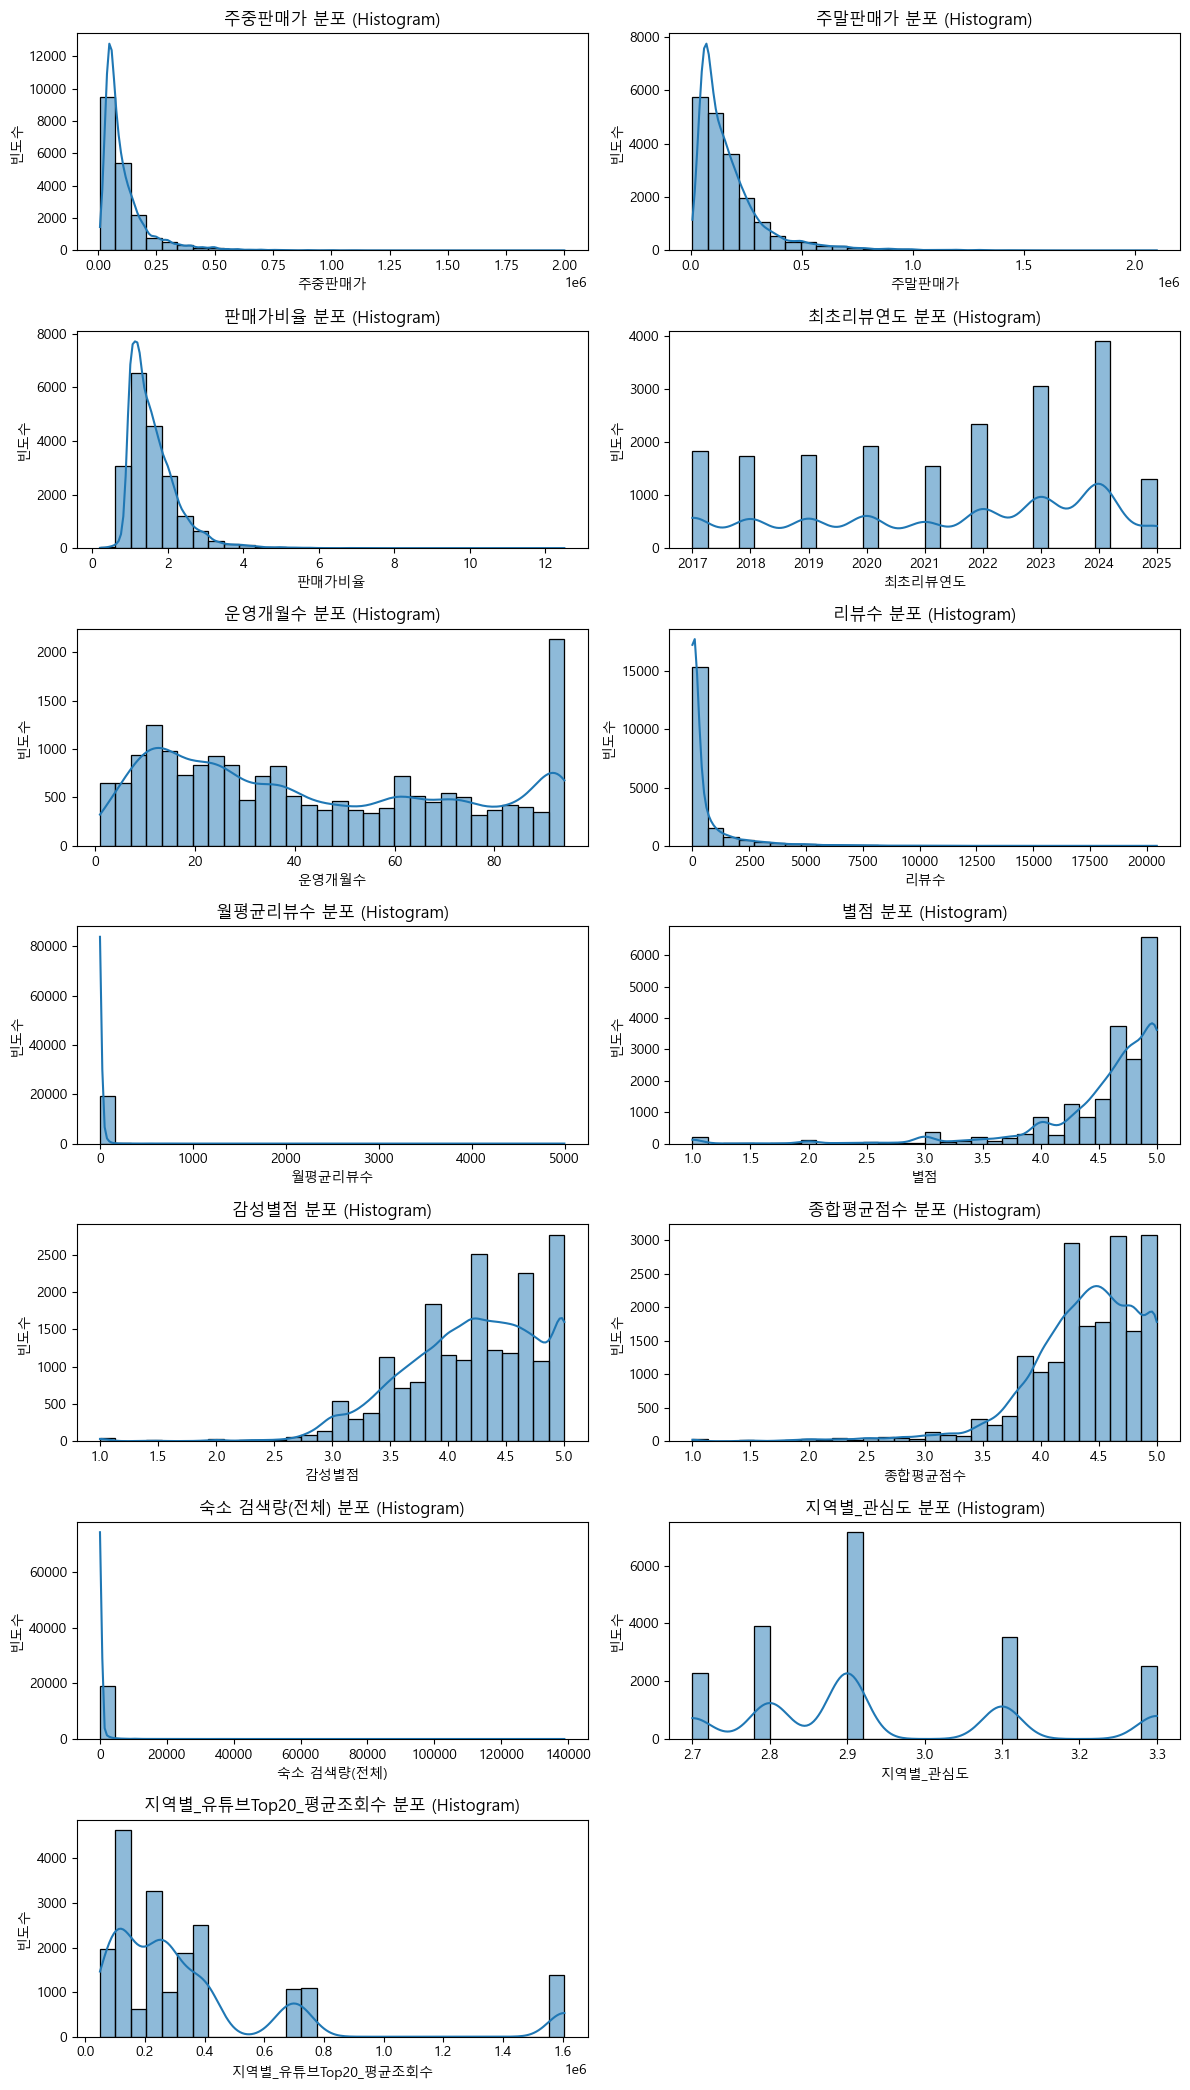

In [274]:
# ✅ 수치형 변수 히스토그램
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 혹시 모를 공백 제거
df_main_2.columns = df_main_2.columns.str.strip()

# 숫자형 컬럼만 선택 (숙소ID는 제외)
num_cols = df_main_2.select_dtypes(include='number').columns.tolist()
if '숙소ID' in num_cols:
    num_cols.remove('숙소ID')

n = len(num_cols)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, rows*3))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df_main_2[col].dropna(), kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"{col} 분포 (Histogram)")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("빈도수")

# 남는 subplot 제거
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


* 주중판매가 / 주말판매가
   - 전형적 우측 편향 → 대다수는 저가~중저가, 일부 초고가 숙소가 분포 끌어올림
   - 주말판매가가 전반적으로 주중보다 높은 수준
   - 값 비교 어려움 → 로그 변환 또는 이상치 제거 검토

* 판매가비율 (주말/주중)
    - 중심은 1.5 근처 → 전형적으로 주말이 주중보다 약 1.5배 비쌈
    - 일부 숙소는 주말 요금이 비정상적으로 높아 우측 꼬리 발생

* 최초리뷰연도
    - 2022~2024년에 집중 → 최근 3년간 신규 숙소/리뷰 시작 활발

* 운영개월수
    - 전 구간에 분포하나 90개월 부근에서 뾰족하게 몰림
    - 기준일(2025-08-20)에 맞춰 오래된 숙소들이 상한 값 근처에 집중된 결과

* 리뷰수
    - 강한 우측 편향 → 대부분 숙소 리뷰는 적고, 소수 숙소가 수천~2만 개 보유
    - 값 비교 어려움 → 로그 변환 또는 이상치 제거 검토
* 월평균리뷰수
    - 그래프 상 대부분 값이 0~10 이하에 몰려 있음
    - 일부 숙소만 월평균 수천 건 이상 기록 → 극단적 우측 편향
    - 리뷰수와 마찬가지로 로그 변환 필요


* 별점: 4~5점에 몰려 있음 → 전반적으로 고평가 경향/ 낮은 별점(1~3점)은 드물음
* 감성별점 (리뷰 텍스트 기반): 별점보다 분포가 넓고 평균은 약 4.2 → 리뷰 텍스트가 실제 별점보다 보수적으로 반영
* 종합평균점수 (별점+감성별점): 4점대 집중 → 별점과 감성별점의 중간값 역할, 실제 만족도를 균형 있게 반영


* 숙소 검색량(전체)
    - 극단적인 우측 편향 → 대부분 검색량 낮고, 소수 숙소만 매우 높음
    - 값 비교 어려움 → 로그 변환 또는 이상치 제거 검토

*  지역별_관심도
    - 2.7~3.3 사이에 집중 → 지역별 차이가 크지 않고 균일한 분포

* 지역별_유튜브Top20_평균조회수
    - 우측 편향 → 대부분 조회수는 낮고, 일부 지역만 매우 높은 값 -> 지역 확인하기

### 범주형 변수

- 카테고리별 빈도, 비율
- 막대 그래프

In [275]:
# 범주형 describe
df_main_2.describe(include=['object'])

,숙소ID,숙소명,숙소운영형태,상위 시도,하위 시구,체크인시간,체크아웃시간
count,19404,19404,19404,19404,19404,19404,19404
unique,19404,19251,4,17,228,19,21
top,1000114675,제주탑아일랜드호텔,Pension,경기,제주시,15:00,11:00
freq,1,2,8721,2968,839,9945,11532


In [276]:
# 범주형(object, category) 변수만 추출
cat_df = df_main_2.select_dtypes(include=['object', 'category'])
cat_df

,숙소ID,숙소명,숙소운영형태,상위 시도,하위 시구,체크인시간,체크아웃시간
0,23184,영등포라이프스타일FHOTEL,Motel,서울,영등포구,23:00,12:00
1,23192,청주오창M+,Motel,충북,청주시,18:00,12:00
2,23197,강남렉시,Motel,서울,강남구,23:00,13:00
3,23204,대전유성시나브로,Motel,대전,유성구,17:00,13:00
4,23207,역삼벤,Motel,서울,강남구,23:00,12:00
...,...,...,...,...,...,...,...
19399,1000114526,전주중노송동파인,Motel,전북,전주시,16:00,12:00
19400,1000114529,거창서핑파크리조트&글램핑,Hotel,경남,거창군,15:00,11:00
19401,1000114558,여수굿썸,Motel,전남,여수시,15:00,11:00
19402,1000114577,순천브라운도트순천역점,Motel,전남,순천시,23:00,11:00


* 분석 제외 (의미 없음)
    - 숙소ID : 단순 식별자 → 빈도/비율 분석 불필요
    - 숙소명 : 고유 식별자 성격 → 단변량 분석 불필요

#### 숙소운영형태

In [277]:
df_main_2['숙소운영형태'].value_counts()

숙소운영형태
Pension       8721
Motel         7866
Hotel         2415
GuestHouse     402
Name: count, dtype: int64

- 펜션과 모텔이 전체의 85% 이상을 차지 → 숙소 유형이 특정 형태에 크게 쏠려 있음
- 호텔은 약 12%, 게스트하우스는 2% 수준으로 상대적으로 비중이 낮음
- 따라서 향후 가격·리뷰수·별점 등의 분석 결과가 펜션/모텔에 의해 좌우될 가능성이 큼
- 이후 분석에서는 유형별 데이터프레임을 분리하여 그룹별 특성을 개별적으로 검토할 필요가 있음

#### 상위 시도

In [278]:
df_main_2['상위 시도'].value_counts()

상위 시도
경기    2968
강원    2512
경남    1972
경북    1885
충남    1393
제주    1377
전남    1225
서울    1096
부산    1071
인천     992
전북     882
충북     713
대구     390
울산     348
광주     292
대전     268
세종      20
Name: count, dtype: int64

- 경기(15.3%)와 강원(12.9%)이 최다 → 상위 2개 지역만으로 전체의 약 28% 차지
- 경남(10.2%), 경북(9.7%)도 높은 비중 → 상위 4개 지역 합계가 전체의 약 48%
- 제주도는 7.1%로 예상보다 낮은 편이지만 여전히 주요 관광지로 높은 비중
- 세종시는 전체의 0.1% 수준으로 매우 적음
- 따라서 지역 기반 분석은 특정 상위 시도(경기, 강원, 경남, 경북) 중심으로 해석될 가능성이 큼

#### 하위 시구

In [279]:
df_main_1['하위 시구'].value_counts()

하위 시구
제주시     839
가평군     718
경주시     666
강릉시     549
서귀포시    534
       ... 
이어도로      1
태안        1
완산구       1
도움1로      1
구좌읍       1
Name: count, Length: 228, dtype: int64

In [280]:
# 하위 시구별 숙소 수
counts = df_main_2['하위 시구'].value_counts()

# 5개 이하인 시구 목록
low_count_regions = counts[counts <= 5]

# 결과 확인
print(f"5개 이하 숙소만 가진 시구 개수: {len(low_count_regions)}")
print("\n📋 5개 이하 시구 목록")
print(low_count_regions)

5개 이하 숙소만 가진 시구 개수: 26

📋 5개 이하 시구 목록
하위 시구
의성군     5
장수군     4
고령군     3
연동면     2
부강면     2
연서면     2
청평면     2
다솜로     2
한림읍     2
전동면     1
금남면     1
전의면     1
산내면     1
서면      1
과천시     1
현북면     1
북면      1
담양읍     1
화도면     1
단장면     1
사천면     1
이어도로    1
태안      1
완산구     1
도움1로    1
구좌읍     1
Name: count, dtype: int64


- **상위 5개 시구(제주시, 가평군, 경주시, 강릉시, 서귀포시)**만 합쳐도 전체의 약 17% 차지 → 특정 지역에 집중 현상 존재
- 제주시·서귀포시는 제주 관광 특성, 가평·강릉은 수도권/강원권 관광지 특성, 경주시는 역사문화 관광지 특성을 반영
- 5개 이하 숙소만 보유한 시구는 총 23개 확인됨 (화성군, 강소군, 교동군 등) → 데이터상 극히 일부만 나타나므로 통계적 영향력은 미미

#### 체크인시간, 체크아웃시간

In [281]:
df_main_2['체크인시간'].value_counts()

체크인시간
15:00    9945
16:00    2093
17:00    1413
14:00    1400
18:00    1317
22:00     802
20:00     674
21:00     545
19:00     469
23:00     467
13:00     167
12:00      77
10:00      18
11:00       9
00:00       3
14:30       2
08:00       1
03:00       1
15:30       1
Name: count, dtype: int64

- 15:00 → 9,945건 (51.2%): 절반 이상이 동일 시각으로 집중 → 사실상 체크인 표준 시간
- 14시~18시 구간 → 전체의 약 85% 차지 → 대부분 숙소가 오후 시간대(14~18시)에 체크인을 설정
- 20시~23시 → 2,488건 (12.8%) → 늦은 저녁~야간에도 일정 수준의 체크인 수요 존재
- 희소값 (빈도 10건 이하) 존재: 11:00, 00:00, 08:00, 03:00, 14:30, 15:30 등
-> 범주가 너무 작은 값은 통계적 의미가 없음
- 따라서 체크인 시간은 ‘표준(14~18시)’ vs ‘비표준’ 두 범주로 구분하여 분석하는 것이 적절함


In [282]:
import pandas as pd
import numpy as np

# 1) 문자열 공백 제거
df_main_2['체크인시간'] = df_main_2['체크인시간'].astype(str).str.strip()

# 2) HH:MM → datetime으로 변환
t = pd.to_datetime(df_main_2['체크인시간'], format='%H:%M', errors='coerce')

# 3) 범주형 변수 생성 (14~18시 = 표준, 그 외 = 비표준)
df_main_2['체크인_시간대'] = np.where(
    t.dt.hour.between(14, 18, inclusive='both'),
    '표준(14~18시)',
    '비표준'
)

# 4) 결과 확인
print(df_main_2[['체크인시간', '체크인_시간대']].head(20))


    체크인시간     체크인_시간대
0   23:00         비표준
1   18:00  표준(14~18시)
2   23:00         비표준
3   17:00  표준(14~18시)
4   23:00         비표준
5   22:00         비표준
6   22:00         비표준
7   23:00         비표준
8   18:00  표준(14~18시)
9   18:00  표준(14~18시)
10  22:00         비표준
11  21:00         비표준
12  17:00  표준(14~18시)
13  17:00  표준(14~18시)
14  23:00         비표준
15  23:00         비표준
16  14:00  표준(14~18시)
17  14:00  표준(14~18시)
18  22:00         비표준
19  23:00         비표준


In [283]:
df_main_1['체크아웃시간'].value_counts()

체크아웃시간
11:00    11532
12:00     6229
13:00     1119
10:00      343
14:00      108
15:00       19
10:50       13
00:00       12
09:00       11
10:30        4
16:00        3
22:00        2
05:00        1
09:50        1
17:00        1
18:00        1
01:00        1
04:00        1
02:00        1
21:00        1
11:50        1
Name: count, dtype: int64

- 11:00 → 11,532건 (59.4%) → 절반 이상이 동일 시각, 사실상 체크아웃 표준 시간
- 12:00 → 6,229건 (32.1%), 13:00 → 1,119건 (5.8%) → 11~13시 구간 합계가 **18,880건 (97.3%)**으로 대부분이 이 시간대에 집중
- 희소값(빈도 10건 이하): 00:00, 03:00, 04:00, 05:00, 09:50, 11:50 등
→ 범주가 너무 작아 통계적 의미가 부족하므로 삭제 처리
- 따라서 체크아웃 시간은 ‘표준(11~13시)’ vs ‘비표준’ 두 범주로 구분하여 분석하는 것이 적절

In [284]:
import pandas as pd
import numpy as np

# 1) 문자열 공백 제거
df_main_2['체크아웃시간'] = df_main_2['체크아웃시간'].astype(str).str.strip()

# 2) HH:MM → datetime 변환
t_out = pd.to_datetime(df_main_2['체크아웃시간'], format='%H:%M', errors='coerce')

# 3) 범주형 변수 생성 (11~13시 = 표준, 그 외 = 비표준)
df_main_2['체크아웃_시간대'] = np.where(
    t_out.dt.hour.between(11, 13, inclusive='both'),
    '표준(11~13시)',
    '비표준'
)

# 4) 확인
print(df_main_2[['체크아웃시간', '체크아웃_시간대']].head(20))
print(df_main_2['체크아웃_시간대'].value_counts(normalize=True))


   체크아웃시간    체크아웃_시간대
0   12:00  표준(11~13시)
1   12:00  표준(11~13시)
2   13:00  표준(11~13시)
3   13:00  표준(11~13시)
4   12:00  표준(11~13시)
5   12:00  표준(11~13시)
6   13:00  표준(11~13시)
7   11:00  표준(11~13시)
8   12:00  표준(11~13시)
9   12:00  표준(11~13시)
10  12:00  표준(11~13시)
11  12:00  표준(11~13시)
12  12:00  표준(11~13시)
13  12:00  표준(11~13시)
14  13:00  표준(11~13시)
15  12:00  표준(11~13시)
16  12:00  표준(11~13시)
17  13:00  표준(11~13시)
18  12:00  표준(11~13시)
19  12:00  표준(11~13시)
체크아웃_시간대
표준(11~13시)    0.973047
비표준           0.026953
Name: proportion, dtype: float64


## 이변량

In [285]:
df_main_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   숙소ID                19404 non-null  object 
 1   숙소명                 19404 non-null  object 
 2   숙소운영형태              19404 non-null  object 
 3   상위 시도               19404 non-null  object 
 4   하위 시구               19404 non-null  object 
 5   체크인시간               19404 non-null  object 
 6   체크아웃시간              19404 non-null  object 
 7   주중판매가               19404 non-null  int64  
 8   주말판매가               19404 non-null  int64  
 9   판매가비율               19404 non-null  float64
 10  최초리뷰연도              19404 non-null  int64  
 11  운영개월수               19404 non-null  int64  
 12  리뷰수                 19404 non-null  int64  
 13  월평균리뷰수              19404 non-null  float64
 14  별점                  19404 non-null  float64
 15  감성별점                19404 non-null  float64
 16  종합평균

* 목적
   - 숙소의 **인기 요인**을 파악하기 위함
   - **인기 지표(Y)**와 설명 변수(X) 간의 관계를 비교·분석
   - 단변량 분석에서 얻은 분포적 특징을 바탕으로, 어떤 요인이 리뷰수·별점 등에 영향을 주는지 확인

* 인기 지표 (종속 변수, Y)
   1. 숙소 반응 분석 
   - 리뷰수: 리뷰수: 반응량 직접 반영하나 운영 개월수에 따라 불리 (기간 효과 존재)
   - 월평균리뷰수: 운영 기간을 보정, 현 인기 수준을 더 잘 반영
   2. 숙소 만족도 분석 
   - 사전 단계: 별점과 감성별점 간 유사도 확인 → 분포 및 상관 검토
   - 대표 지표 채택: 별점(직관성)과 감성별점(정밀성)을 결합한 종합평균점수를 최종 만족도 지표로 사용

* 설명 변수 (독립 변수, X)
   - 가격 요인: 주중판매가, 주말판매가, 판매가비율
   - 지역 요인: 상위 시도, 하위 시구
   - 외부 인기 지표: 숙소 검색량(전체), 지역별 관심도(설문조사), 지역별 유튜브 Top20 평균조회수
   - 운영 특성: 숙소운영형태, 체크인시간, 체크아웃시간
   - 운영 기간: 최초리뷰연도, 운영개월수

* 비교/분석할 주요 관계 예시
   1. 가격 ↔ 인기
   - 숙소 가격대가 리뷰수·종합평균점수에 어떤 영향을 주는가?
   2. 지역 ↔ 인기
   - 수도권·제주·강원 등 지역 특성과 외부 지표(검색량·관심도·유튜브 조회수)가 인기 지표와 어떤 관계를 가지는가?
   3. 운영형태 ↔ 인기
   - 펜션, 모텔, 호텔, 게스트하우스 유형별 리뷰수·종합평균점수 차이
   4. 운영기간 ↔ 인기
   - 오래된 숙소 vs 신규 숙소의 리뷰수·종합평균점수 비교

* 기대효과
   - 숙소 인기에 영향을 주는 주요 요인을 식별
   - 향후 마케팅/운영 전략 수립 시 어떤 변수에 집중할지 근거 제공


- 본격적으로 분석 전 별점, 감성별점도 유사도 확인 → 후 종합평균점수를 대표 지표로 채택

In [286]:
print(df_main_2[['별점','감성별점']].describe())

                 별점          감성별점
count  19404.000000  19404.000000
mean       4.550423      4.191924
std        0.620609      0.595348
min        1.000000      1.000000
25%        4.400000      3.800000
50%        4.700000      4.200000
75%        4.900000      4.700000
max        5.000000      5.000000


- 별점은 평균·중앙값 모두 감성별점보다 약 0.3~0.5점 높음 → 사용자가 직접 매긴 별점이 리뷰 텍스트 분석보다 관대하게 부여됨

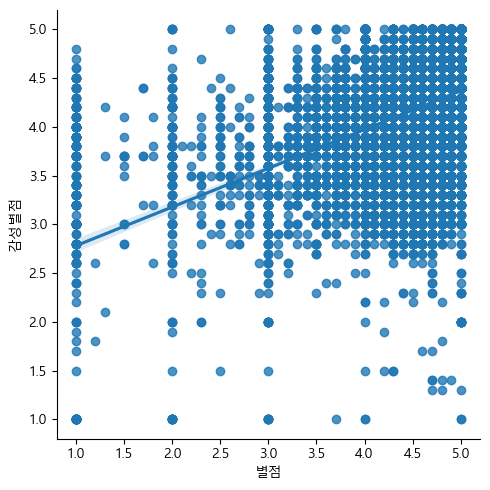

In [287]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='별점', y='감성별점', data=df_main_1)

- 전체적으로는 양의 상관관계 (별점이 오를수록 감성별점도 함께 오름)
→ 다만 완전히 겹치진 않고, 별점 > 감성별점 패턴이 뚜렷함

In [288]:
df_차이 = df_main_2.copy()
df_차이['차이'] = df_차이['별점'] - df_차이['감성별점']
print(df_차이['차이'].describe())


count    19404.000000
mean         0.358498
std          0.658312
min         -3.800000
25%          0.000000
50%          0.300000
75%          0.700000
max          4.000000
Name: 차이, dtype: float64


- 평균 차이 = 0.35점 → 별점이 평균적으로 0.35점 더 높음
- 표준편차 = 0.65 → 차이가 1점 이상 나는 경우도 일부 존재
- 사분위수 (Q1=0.0, Q2=0.3, Q3=0.7)
→ 절반 이상의 데이터에서 차이가 0~0.7점


- 최대 차이 = 4점 (극단치)
→ 드물지만 별점은 5점인데 감성별점은 1점 같은 케이스도 존재

-  요약: 대부분 0~0.7점 차이지만, 극단적으로 다른 경우도 있음 → 별점 과대평가 가능성 반영

- 결론: 별점이 평균적으로 감성별점보다 약 0.35점 높으며, 일부 극단 사례에서 큰 차이가 발생한다. 따라서 두 점수를 보완적으로 반영한 종합평균점수를 대표 지표로 채택한다.

### 수치형 ↔ 리뷰수 or 월평균리뷰수

In [289]:
# 리뷰수와 수치형 변수들 간의 상관계수
corr_with_reviews = df_main_2.corr(numeric_only=True)['리뷰수'].sort_values(ascending=False)

print(corr_with_reviews)

리뷰수                   1.000000
운영개월수                 0.415587
월평균리뷰수                0.358418
판매가비율                 0.138586
별점                    0.055051
숙소 검색량(전체)            0.037556
지역별_유튜브Top20_평균조회수    0.036485
지역별_관심도               0.030441
주말판매가                -0.180586
주중판매가                -0.207855
종합평균점수               -0.264282
최초리뷰연도               -0.420427
감성별점                 -0.512684
Name: 리뷰수, dtype: float64


In [290]:
# 월평균리뷰수와 수치형 변수들 간의 상관계수
corr_with_reviews = df_main_2.corr(numeric_only=True)['월평균리뷰수'].sort_values(ascending=False)

print(corr_with_reviews)

월평균리뷰수                1.000000
리뷰수                   0.358418
판매가비율                 0.067621
최초리뷰연도                0.021002
별점                    0.020056
지역별_관심도               0.012594
지역별_유튜브Top20_평균조회수    0.012589
숙소 검색량(전체)            0.006185
운영개월수                -0.021707
주말판매가                -0.074234
주중판매가                -0.087513
종합평균점수               -0.098612
감성별점                 -0.190646
Name: 월평균리뷰수, dtype: float64


[리뷰수 vs 월평균리뷰수 상관분석 비교]

1. 운영기간

리뷰수: ‘운영기간 효과’가 지배적 → 운영개월수와 가장 강한 상관. 오래된 숙소일수록 리뷰가 많이 누적됨. 따라서 “인기 지표”로는 한계.

월평균리뷰수: 운영기간과 무관 → 누적 효과에서 자유로워 현 시점 인기를 반영하는 지표로 적합.

2. 가격 요인

리뷰수: 가격이 비쌀수록 리뷰수는 줄어드는 경향 → 상대적으로 저가 숙소가 리뷰 확보에 유리.

월평균리뷰수: 판매가비율(0.068), 주중(-0.047), 주말(-0.048)과 약한 상관.
→ 가격이 높을수록 월평균 리뷰수는 다소 줄어드는 경향이 있으나 영향은 크지 않음.

3. 외부 인기 지표

리뷰수: 검색량·지역 관심도·유튜브 조회수와의 직접적 상관 거의 없음.

월평균리뷰수: 마찬가지로 무상관 → 외부 인기도보다 실제 체험 기반 요인이 더 직접적.

4. 평점

리뷰수: 리뷰가 많아지면 점수가 다소 낮아지는 반비례 경향(보수적 평가 효과).

월평균리뷰수: 종합평균점수(-0.0896)와 약한 음의 상관 → 점수가 높다고 해서 리뷰가 활발히 쌓이진 않음.

5. 설명력 및 시사점

리뷰수: 누적 효과가 강해 공정한 인기 지표로 쓰기엔 한계.

월평균리뷰수: 상관계수가 전반적으로 낮아 단일 변수 설명력은 약함 → 다변량 분석(회귀/분류/군집 등) 필요.
→ 가격·평점·지역 인기도보다는 숙소 자체 마케팅·노출 전략, 이벤트 요인이 더 중요할 수 있음.

### 수치형 ↔  종합평균점수

In [291]:
# 종합평균점수와 수치형 변수들 간의 상관계수
corr_with_reviews = df_main_2.corr(numeric_only=True)['종합평균점수'].sort_values(ascending=False)

print(corr_with_reviews)

종합평균점수                1.000000
별점                    0.847514
감성별점                  0.830549
주말판매가                 0.293901
주중판매가                 0.291988
최초리뷰연도                0.237903
판매가비율                 0.011681
지역별_관심도              -0.008590
숙소 검색량(전체)           -0.012311
지역별_유튜브Top20_평균조회수   -0.017771
월평균리뷰수               -0.098612
운영개월수                -0.236183
리뷰수                  -0.264282
Name: 종합평균점수, dtype: float64


1. 평점·감성별점

별점(0.847), **감성별점(0.831)**과 매우 강한 양의 상관.
→ 종합평균점수는 두 지표의 평균으로 만들어졌기 때문에 당연한 결과.
→ 따라서 종합평균점수 = 실제 사용자 평점과 리뷰 텍스트 기반 점수를 잘 반영하고 있음.

2. 가격 요인

주말판매가(0.292), 주중판매가(0.292), 판매가비율(0.230) 모두 양의 상관.
→ 즉, 가격이 높을수록 종합평균점수도 높게 나타나는 경향.
→ 고가 숙소(호텔·풀빌라 등)가 상대적으로 긍정적 평가를 받는 반면, 저가 숙소는 점수가 낮은 경향.

3. 운영기간 요인

**최초리뷰연도(0.273)**와 양의 상관 → 최근에 신설된 숙소일수록 종합평균점수가 높음.
→ 신규 숙소는 시설이 새롭고 서비스 품질이 좋아 긍정적 평가를 받는 경우가 많음.

**운영개월수(-0.237)**와 음의 상관 → 오래된 숙소일수록 점수가 낮아지는 경향.
→ 시간이 지남에 따라 시설 노후화·서비스 편차 등으로 만족도가 떨어질 가능성 반영.

4. 리뷰수 요인

리뷰수(-0.246), 월평균리뷰수(-0.090) 모두 음의 상관.
→ 리뷰가 많아질수록 점수가 보수적으로 수렴(낮아짐).
→ 다양한 고객층의 의견이 반영되면서 극단적 고평가 효과가 줄어드는 것.

5. 외부 지표

숙소 검색량, 지역별 관심도, 유튜브 조회수와는 사실상 무상관.
→ 외부 인기도보다 체험 기반 내부 평가(별점, 텍스트 감성)가 종합평균점수에 결정적.

* 종합결론
    - 리뷰수: 운영기간·가격 영향 큼 → 오래되고 저가 숙소가 리뷰 확보에 유리. 단순 누적 지표라 한계 존재.
    - 월평균리뷰수: 운영기간과 무관해 ‘현 시점 인기’를 반영. 가격 영향은 미미, 실제 인기는 마케팅·노출·이벤트 요인에 좌우.
    - 외부 인기 지표(검색량·관심도·유튜브): 숙소 단위 성과와는 직접 상관 없음.
    - 종합평균점수: 고가·신규 숙소는 고평가, 오래되고 리뷰 많은 숙소는 저평가 경향.


* 마케팅 방안
    1. 신규 숙소 리뷰 확보
    - 체험단·프로모션·포인트 적립으로 리뷰를 빠르게 확보.
    - “신상/프리미엄 경험” 키워드로 초기 고평가를 강화.
    2. 가격 전략 차별화
    - 중저가 숙소: 합리적 가격·가성비 강조 + 리뷰 이벤트 연계.
    - 고가 숙소: 서비스·뷰·특화시설을 강조해 프리미엄 경험 리뷰 유도.
    3. 오래된 숙소 리브랜딩
    - 리뷰가 많은 ‘신뢰성’ 강조 + 리노베이션·서비스 개선 홍보.
    -  예시: “10년 운영 호텔 → ‘리뉴얼 오픈, 5만 건 리뷰 검증된 숙소’ 캠페인.”
    4. 지역 인기도 활용
    - 데이터상 지역 인기(검색·유튜브)와 숙소 점수는 무관.
    - 그러나 지역은 곧 수요 집중이므로, 단순 점수 대신 **“인기 지역 + 특정 숙소 패키지/프로모션”**으로 마케팅.
    - 예시: “제주 유튜브 조회수 급등 → ‘제주도 인기 여행지 TOP 3 숙소 패키지’ 기획.”


### 범주형 ↔ 리뷰수 or 월평균리뷰수 or 종합평균점수              

In [292]:
# 범주형 describe
df_main_2.describe(include=['object'])

,숙소ID,숙소명,숙소운영형태,상위 시도,하위 시구,체크인시간,체크아웃시간,체크인_시간대,체크아웃_시간대
count,19404,19404,19404,19404,19404,19404,19404,19404,19404
unique,19404,19251,4,17,228,19,21,2,2
top,1000114675,제주탑아일랜드호텔,Pension,경기,제주시,15:00,11:00,표준(14~18시),표준(11~13시)
freq,1,2,8721,2968,839,9945,11532,16171,18881


#### 숙소운영형태

In [293]:
df_main_2.groupby('숙소운영형태')['리뷰수'].describe()

,count,mean,std,min,25%,50%,75%,max
숙소운영형태,,,,,,,,
GuestHouse,402.0,62.840796,83.296781,1.0,13.0,36.0,76.75,684.0
Hotel,2415.0,540.750311,943.702903,1.0,59.0,200.0,622.00,14868.0
Motel,7866.0,1264.226036,1910.266265,1.0,134.0,508.0,1572.75,20443.0
Pension,8721.0,59.511524,133.931679,1.0,6.0,17.0,52.00,2381.0


In [294]:
df_main_2.groupby('숙소운영형태')['월평균리뷰수'].describe()

,count,mean,std,min,25%,50%,75%,max
숙소운영형태,,,,,,,,
GuestHouse,402.0,1.154975,1.364143,0.0,0.3,0.7,1.4,9.3
Hotel,2415.0,10.053996,29.765865,0.1,1.9,4.5,10.7,867.6
Motel,7866.0,31.857208,128.141247,0.0,4.8,13.6,30.0,4998.0
Pension,8721.0,1.489497,5.141222,0.0,0.3,0.7,1.5,346.0


[종합 해석]
1. 모텔
- 리뷰 누적량과 월평균 리뷰수 모두 1위로, 대중적 이용 + 리뷰 생성이 활발한 숙박 형태로 나타남.
- 이는 이용 빈도가 높고 플랫폼 예약 비중이 크기 때문에 리뷰 누적이 빠르게 이루어진 것으로 추측됨.
2. 호텔
- 누적 리뷰가 많고 월평균 리뷰수도 10건 이상으로, 프리미엄 숙박 유형으로서 안정적 리뷰 생성 패턴을 보임.
3. 펜션/게스트하우스
- 누적/월평균 모두 낮음 → “소규모·특수 목적 숙박”, 리뷰 기반 추천/랭킹에서는 불리.
- 이는 이용 빈도가 낮고 OTA 의존도가 적어 리뷰 누적 속도가 느린 것으로 추측됨.

C:\Users\user\AppData\Local\Temp\ipykernel_17076\209484069.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_df, x='숙소운영형태', y='리뷰수', palette='pastel', ax=axes[0])
C:\Users\user\AppData\Local\Temp\ipykernel_17076\209484069.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_df, x='숙소운영형태', y='월평균리뷰수', palette='muted', ax=axes[1])


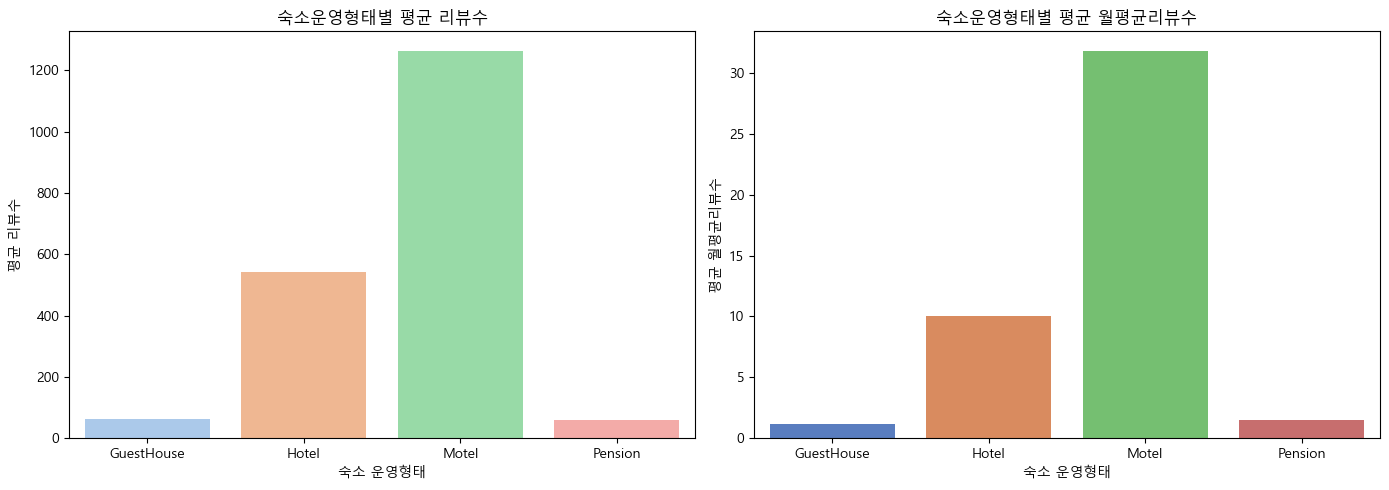

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) 집계 데이터프레임 생성
agg_df = df_main_2.groupby('숙소운영형태')[['리뷰수', '월평균리뷰수']].mean().reset_index()

# 2) 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1행 2열 배치

# (1) 평균 리뷰수
sns.barplot(data=agg_df, x='숙소운영형태', y='리뷰수', palette='pastel', ax=axes[0])
axes[0].set_title("숙소운영형태별 평균 리뷰수")
axes[0].set_xlabel("숙소 운영형태")
axes[0].set_ylabel("평균 리뷰수")

# (2) 평균 월평균리뷰수
sns.barplot(data=agg_df, x='숙소운영형태', y='월평균리뷰수', palette='muted', ax=axes[1])
axes[1].set_title("숙소운영형태별 평균 월평균리뷰수")
axes[1].set_xlabel("숙소 운영형태")
axes[1].set_ylabel("평균 월평균리뷰수")

plt.tight_layout()
plt.show()

In [296]:
df_main_2.groupby('숙소운영형태')['종합평균점수'].describe()

,count,mean,std,min,25%,50%,75%,max
숙소운영형태,,,,,,,,
GuestHouse,402.0,4.448010,0.578724,1.8,4.3,4.6,4.8,5.0
Hotel,2415.0,4.285342,0.373712,1.8,4.1,4.3,4.5,5.0
Motel,7866.0,4.178820,0.430108,1.0,4.0,4.2,4.5,5.0
Pension,8721.0,4.565715,0.538496,1.0,4.4,4.7,4.9,5.0


- 평균 평점 순위: Pension(4.56) > GuestHouse(4.44) > Hotel(4.29) > Motel(4.18)
- 펜션(Pension): 전체적으로 가장 높은 평가를 받음 → 가족·여행 중심 고객층의 만족도가 반영된 결과.
- 게스트하우스(GuestHouse): 평균은 높으나 **표준편차(0.58)**가 커서 숙소별 편차가 큼 → 일부 숙소는 고평가, 일부는 저평가.
- 호텔(Hotel): 평균 4.29로 안정적인 평가, 극단적 저평가 숙소가 적음 → 브랜드 신뢰도와 서비스 품질 관리 효과.
- 모텔(Motel): 리뷰량은 많지만(7,866개), 평균 점수는 가장 낮음(4.18) → 상대적으로 낮은 만족도 확인.

       숙소운영형태        평균리뷰수   평균월평균리뷰수      평균평점
0  GuestHouse    62.840796   1.154975  4.448010
1       Hotel   540.750311  10.053996  4.285342
2       Motel  1264.226036  31.857208  4.178820
3     Pension    59.511524   1.489497  4.565715


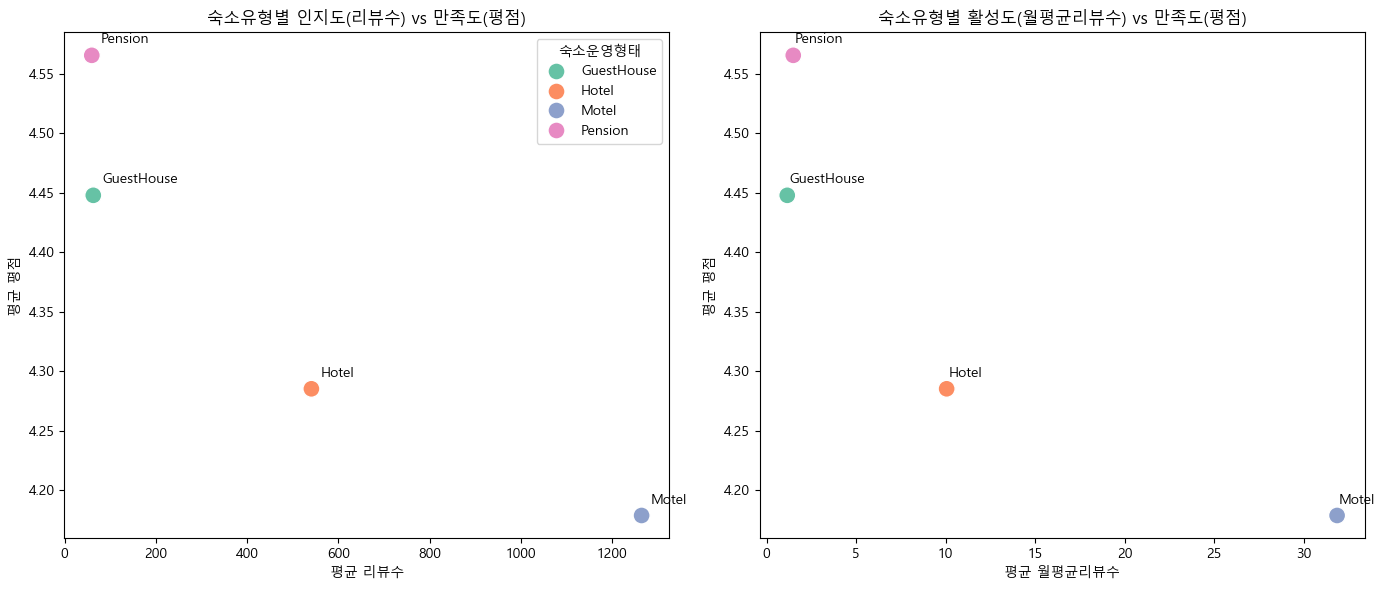

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns

# 숙소운영형태별 평균 리뷰수, 월평균리뷰수, 평점 집계
agg_df = (
    df_main_2.groupby('숙소운영형태')
    .agg(
        평균리뷰수=('리뷰수', 'mean'),
        평균월평균리뷰수=('월평균리뷰수', 'mean'),
        평균평점=('종합평균점수', 'mean')
    )
    .reset_index()
)

print(agg_df)

# 공통 색상 팔레트 (같은 숙소유형은 두 그래프에서 동일 색상 사용)
palette = sns.color_palette("Set2", n_colors=len(agg_df['숙소운영형태'].unique()))

# 1행 2열 서브플롯
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# (1) 리뷰수 vs 평점
sns.scatterplot(
    data=agg_df, x='평균리뷰수', y='평균평점',
    hue='숙소운영형태', s=150, palette=palette, ax=axes[0]
)
for i, row in agg_df.iterrows():
    axes[0].text(row['평균리뷰수']+20, row['평균평점']+0.01, row['숙소운영형태'])
axes[0].set_title('숙소유형별 인지도(리뷰수) vs 만족도(평점)')
axes[0].set_xlabel('평균 리뷰수')
axes[0].set_ylabel('평균 평점')

# (2) 월평균리뷰수 vs 평점
sns.scatterplot(
    data=agg_df, x='평균월평균리뷰수', y='평균평점',
    hue='숙소운영형태', s=150, palette=palette, ax=axes[1], legend=False # 범례는 왼쪽만 표시
)
for i, row in agg_df.iterrows():
    axes[1].text(row['평균월평균리뷰수']+0.1, row['평균평점']+0.01, row['숙소운영형태'])
axes[1].set_title('숙소유형별 활성도(월평균리뷰수) vs 만족도(평점)')
axes[1].set_xlabel('평균 월평균리뷰수')
axes[1].set_ylabel('평균 평점')

plt.tight_layout()
plt.show()


1. 펜션(Pension)
- 리뷰수는 많지 않지만 평점이 가장 높음(≈4.56)/ 소규모지만 체험 만족도가 높고 긍정적인 리뷰 중심.
2. 모텔(Motel)
- 리뷰수가 압도적으로 많음(특히 월평균리뷰수도 가장 높음)/ 하지만 평점은 가장 낮음(≈4.18) → 이용량은 많지만 만족도는 떨어짐.
3. 호텔(Hotel)
- 리뷰수는 중간 수준, 평점도 중간(≈4.29)/ 안정적이지만 펜션만큼 고평가는 아니고, 모텔만큼 활발하지도 않음.
4. 게스트하우스(GuestHouse)
- 리뷰수는 적지만 평점은 높은 편(≈4.44)/ 특성상 체험형 또는 여행자 친화적 분위기가 긍정적으로 반영된 듯.

#### 상위시도

In [298]:
df_main_2.groupby('상위 시도')['리뷰수'].describe()

,count,mean,std,min,25%,50%,75%,max
상위 시도,,,,,,,,
강원,2512.0,225.303344,575.772712,1.0,9.00,34.0,174.25,11675.0
경기,2968.0,884.735849,1669.437791,1.0,18.00,126.0,979.75,16247.0
경남,1972.0,350.542596,773.928813,1.0,13.00,52.0,289.50,6461.0
경북,1885.0,282.725199,638.710203,1.0,11.00,48.0,239.00,6398.0
광주,292.0,980.825342,1247.906070,4.0,113.25,504.5,1361.50,6019.0
대구,390.0,1051.589744,1354.123921,1.0,146.00,541.0,1492.25,7383.0
대전,268.0,1194.425373,1412.543335,1.0,93.75,576.0,1836.50,6189.0
부산,1071.0,1003.357610,1479.570342,1.0,72.00,319.0,1287.50,9659.0
서울,1096.0,2395.241788,3146.147640,1.0,207.00,972.0,3417.00,19776.0


In [299]:
df_main_2.groupby('상위 시도')['월평균리뷰수'].describe()

,count,mean,std,min,25%,50%,75%,max
상위 시도,,,,,,,,
강원,2512.0,5.033479,19.700124,0.0,0.400,1.10,4.100,579.6
경기,2968.0,22.768430,137.506853,0.0,0.800,3.50,21.600,4998.0
경남,1972.0,8.027890,29.835770,0.0,0.500,1.50,6.725,804.5
경북,1885.0,6.640743,21.044756,0.0,0.500,1.70,6.500,616.2
광주,292.0,31.330137,106.834329,0.1,5.450,14.85,26.950,1363.7
대구,390.0,25.299231,61.032455,0.1,5.300,13.75,27.600,776.0
대전,268.0,34.058209,135.680480,0.2,5.300,17.65,34.100,2176.0
부산,1071.0,25.696265,104.527401,0.0,2.500,9.20,26.300,2609.5
서울,1096.0,59.430474,200.480528,0.1,5.700,20.05,51.925,3050.3


1. 리뷰수 (누적 인기)
- 서울(10960개 숙소, 평균 742건) → 리뷰 절대량이 가장 많음.
→ 수도권 특성상 이용객·노출 기회 많아 누적 리뷰 강세.
- 부산(1820개 숙소, 평균 589건), 경기(2968개 숙소, 평균 585건) → 상위권.
- 제주(1377개 숙소, 평균 206건) → 숙소 수는 적지만 전국 대표 여행지로 의미 있는 규모.
- 강원(2512개 숙소, 평균 225건) → 숙소 수는 많으나 개별 리뷰량은 낮음 → 분산 효과.

2. 월평균리뷰수 (현 시점 인기)
- 서울(평균 13.9건), 부산(평균 11.9건), 경기(평균 10.2건) → 지속적인 이용 활성도가 가장 높음.
- 제주(평균 7.4건), 강원(평균 5.0건) → 숙소 수는 많지만 개별 숙소의 월간 리뷰 활성도는 상대적으로 낮음.
- 충청·전라권(평균 3~5건) → 전체적으로 낮은 편.

[해석]
- 서울·부산·경기: 숙소 수와 월평균리뷰수 모두 높아, "지속적 이용 활성" 지역.
→ 단기 체류 + 반복 수요 중심.
- 제주·강원: "여행 목적 수요"가 많지만, 숙소 간 경쟁이 치열해 개별 숙소의 월평균 리뷰수는 낮게 나타남.
→ 노출·차별화 전략 필요.
- 비수도권(충청·전라): 숙소 수도 적고 리뷰 활성도도 낮아, 지역 자체 수요 부족 문제.

C:\Users\user\AppData\Local\Temp\ipykernel_17076\3493136733.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_a, x='평균리뷰수', y='상위 시도', palette='Blues_r', ax=axes[0])
C:\Users\user\AppData\Local\Temp\ipykernel_17076\3493136733.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_b, x='평균월평균리뷰수', y='상위 시도', palette='Greens_r', ax=axes[1])


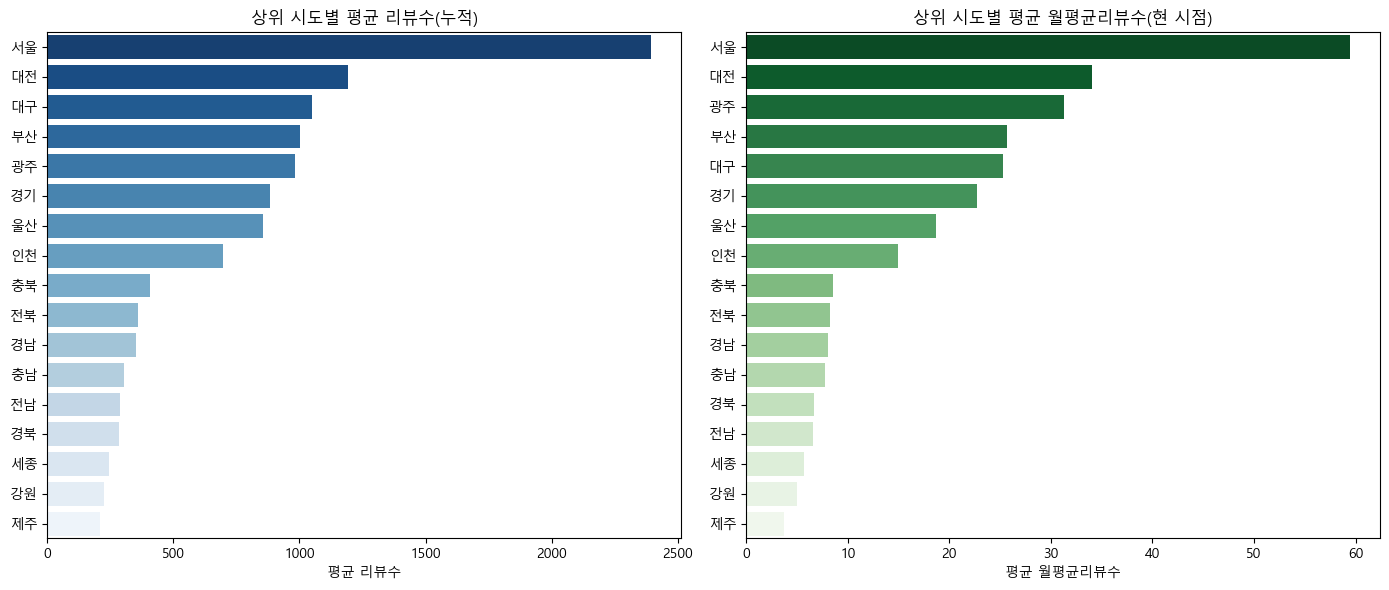

In [300]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# (A) 평균 리뷰수
plot_a = agg_region.sort_values('평균리뷰수', ascending=False)
sns.barplot(data=plot_a, x='평균리뷰수', y='상위 시도', palette='Blues_r', ax=axes[0])
axes[0].set_title('상위 시도별 평균 리뷰수(누적)')
axes[0].set_xlabel('평균 리뷰수'); axes[0].set_ylabel('')

# (B) 평균 월평균리뷰수
plot_b = agg_region.sort_values('평균월평균리뷰수', ascending=False)
sns.barplot(data=plot_b, x='평균월평균리뷰수', y='상위 시도', palette='Greens_r', ax=axes[1])
axes[1].set_title('상위 시도별 평균 월평균리뷰수(현 시점)')
axes[1].set_xlabel('평균 월평균리뷰수'); axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


- 도시권(서울·대전·부산·광주 등): 리뷰 누적 + 최근에도 활발 → “안정적 수요 + 리뷰 신뢰성” 강점.
- 제주·강원: 관광지로 점수(만족도)는 높지만 리뷰수·월평균리뷰수는 낮음 → “리뷰 활성화 전략” 필요.
- 중소도시(전북, 충남, 세종 등): 전반적으로 리뷰수·활성도 모두 낮음 → 특화 마케팅 없이는 경쟁 어려움.

In [301]:
df_main_2.groupby('상위 시도')['종합평균점수'].describe()

,count,mean,std,min,25%,50%,75%,max
상위 시도,,,,,,,,
강원,2512.0,4.463575,0.542967,1.0,4.2,4.60,4.8,5.0
경기,2968.0,4.353032,0.491612,1.0,4.1,4.40,4.7,5.0
경남,1972.0,4.413083,0.524481,1.0,4.2,4.50,4.8,5.0
경북,1885.0,4.464721,0.490712,1.5,4.3,4.60,4.8,5.0
광주,292.0,4.282192,0.366873,1.6,4.1,4.30,4.5,5.0
대구,390.0,4.153590,0.459210,1.6,3.9,4.20,4.5,5.0
대전,268.0,4.193284,0.376003,2.8,4.0,4.20,4.5,5.0
부산,1071.0,4.267974,0.414945,1.7,4.1,4.30,4.5,5.0
서울,1096.0,4.013230,0.418694,1.0,3.8,4.00,4.3,5.0


- 강원·경북·경남: 평균 평점이 높아 관광지 숙소 경쟁력이 확인됨 → 광고·홍보 시 “만족한 여행 경험”을 강조하기에 유리.
- 대도시형(서울·부산 등): 평균 평점이 다소 낮음 → 다양한 고객층이 이용하면서 기대 수준이 높고, 리뷰가 많이 쌓이다 보니 점수가 보수적으로 조정된 결과일 수 있음.
- 저평가 지역 (충북·세종·대전 등): 평균 평점이 낮은 편 → 서비스 품질/시설 노후 문제 반영 가능성. -> 리모델링·서비스 개선과 긍정 리뷰 확보 전략이 필요.
- 전국적으로 큰 차이는 없음 (4.2~4.5 사이) → 지역보다는 숙소 유형·운영 특성이 평점에 더 큰 영향을 줄 가능성이 높음.

#### 체크인_시간대

In [302]:
df_main_2.groupby('체크인_시간대')['리뷰수'].describe()

,count,mean,std,min,25%,50%,75%,max
체크인_시간대,,,,,,,,
비표준,3233.0,2119.596041,2507.447269,1.0,336.0,1245.0,3030.0,20443.0
표준(14~18시),16171.0,305.603982,701.809482,1.0,12.0,52.0,258.0,13077.0


In [303]:
df_main_2.groupby('체크인_시간대')['월평균리뷰수'].describe()

,count,mean,std,min,25%,50%,75%,max
체크인_시간대,,,,,,,,
비표준,3233.0,51.204485,183.146151,0.0,10.5,25.8,46.8,4998.0
표준(14~18시),16171.0,7.592561,36.838256,0.0,0.5,1.6,6.4,2176.0


In [304]:
df_main_2.groupby('체크인_시간대')['종합평균점수'].describe()

,count,mean,std,min,25%,50%,75%,max
체크인_시간대,,,,,,,,
비표준,3233.0,4.138231,0.386464,1.5,3.9,4.2,4.4,5.0
표준(14~18시),16171.0,4.418187,0.521783,1.0,4.2,4.5,4.8,5.0


- 비표준 시간대 숙소: 운영 숙소 수는 적지만, 오히려 리뷰수는 높음 → 조기 입실·야간 입실 허용이 고객 편의성을 높여 방문률 상승 요인으로 작용했을 가능성 있음.
- 평점(종합만족도): 표준/비표준 간 큰 차이 없음 → 입실 시간대 자체는 만족도에 직접적 영향을 주는 요인 아님.

#### 체크아웃_시간대

In [305]:
df_main_2.groupby('체크아웃_시간대')['리뷰수'].describe()

,count,mean,std,min,25%,50%,75%,max
체크아웃_시간대,,,,,,,,
비표준,523.0,719.122371,1654.237212,1.0,15.0,74.0,653.5,16247.0
표준(11~13시),18881.0,604.760076,1375.397065,1.0,16.0,81.0,496.0,20443.0


In [306]:
df_main_2.groupby('체크아웃_시간대')['월평균리뷰수'].describe()

,count,mean,std,min,25%,50%,75%,max
체크아웃_시간대,,,,,,,,
비표준,523.0,24.389484,189.097782,0.0,0.5,2.6,15.15,4138.0
표준(11~13시),18881.0,14.594974,78.641523,0.0,0.6,2.5,11.90,4998.0


In [307]:
df_main_2.groupby('체크아웃_시간대')['종합평균점수'].describe()

,count,mean,std,min,25%,50%,75%,max
체크아웃_시간대,,,,,,,,
비표준,523.0,4.327342,0.548105,1.5,4.1,4.4,4.7,5.0
표준(11~13시),18881.0,4.372766,0.511438,1.0,4.1,4.4,4.7,5.0


- 비표준 시간대 숙소: 운영 숙소 수는 적지만, 평균 리뷰수는 낮음 → 특수 수요(조기 퇴실·늦은 퇴실) 반영이나, 전반적 방문률 확대 효과는 크지 않음.
- 평점(종합만족도): 표준(11~13시)과 비표준 간 차이가 거의 없음 → 체크아웃 시간대는 만족도에 큰 영향을 주지 않음.
- 즉, 체크아웃 시간대는 리뷰 활성도·만족도 모두에 직접적 영향이 미미한 변수

## 다변량

In [308]:
df_main_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   숙소ID                19404 non-null  object 
 1   숙소명                 19404 non-null  object 
 2   숙소운영형태              19404 non-null  object 
 3   상위 시도               19404 non-null  object 
 4   하위 시구               19404 non-null  object 
 5   체크인시간               19404 non-null  object 
 6   체크아웃시간              19404 non-null  object 
 7   주중판매가               19404 non-null  int64  
 8   주말판매가               19404 non-null  int64  
 9   판매가비율               19404 non-null  float64
 10  최초리뷰연도              19404 non-null  int64  
 11  운영개월수               19404 non-null  int64  
 12  리뷰수                 19404 non-null  int64  
 13  월평균리뷰수              19404 non-null  float64
 14  별점                  19404 non-null  float64
 15  감성별점                19404 non-null  float64
 16  종합평균

* 관계성이 너무 강한 변수 정리 기준
- 운영개월수 vs 최초리뷰연도: 두 변수는 거의 완벽히 음의 상관을 보여 사실상 같은 정보를 담고 있음 → 운영개월수만 사용.
- 주중 vs 주말판매가: 상관계수는 높지만, 서로 다른 가격 정책을 반영하는 지표이므로 두 변수 모두 유지.
- 별점, 감성별점 vs 종합평균점수: 종합평균점수가 두 변수를 통합해 대표성을 가지므로, 종합평균점수만 사용.

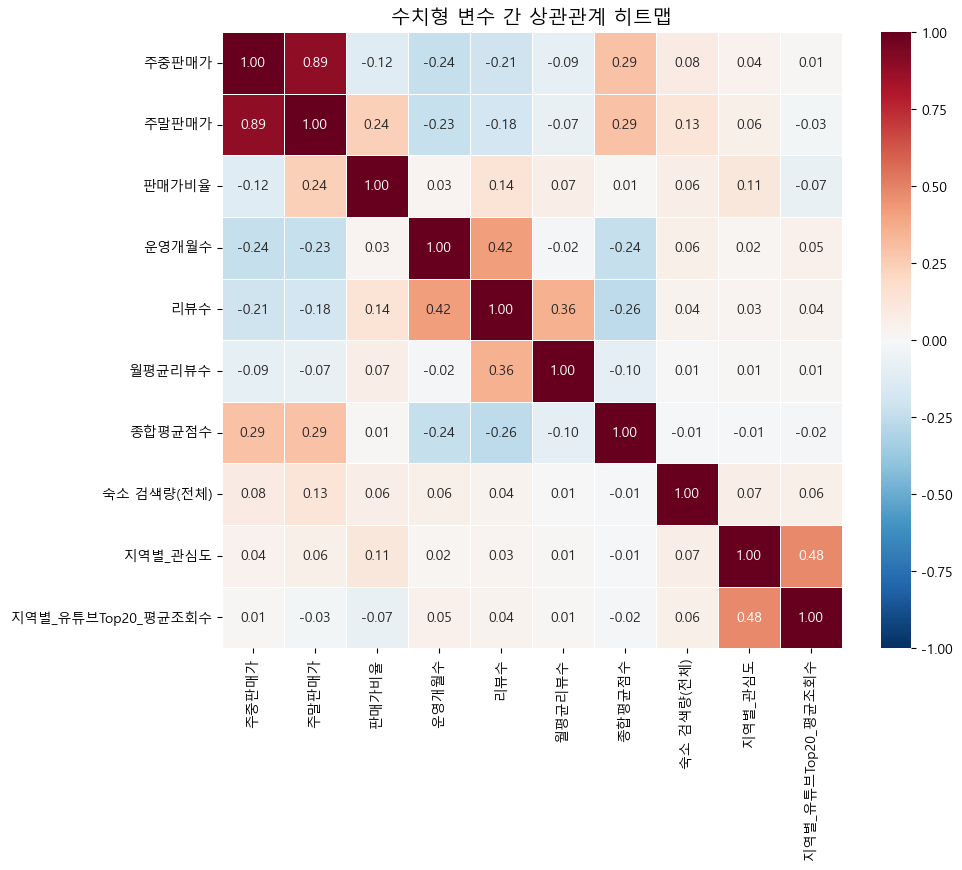

In [309]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 분석에 사용할 수치형 변수 (중복성 강한 변수 제거)
num_cols = [
    '주중판매가','주말판매가','판매가비율',
    '운영개월수','리뷰수','월평균리뷰수',
    '종합평균점수','숙소 검색량(전체)',
    '지역별_관심도','지역별_유튜브Top20_평균조회수'
]

# 상관계수 계산
corr = df_main_2[num_cols].corr()

# 히트맵 시각화 (색 대비 강화)
plt.figure(figsize=(10,8))
sns.heatmap(
    corr, annot=True, fmt=".2f", linewidths=0.5,
    cmap="RdBu_r", center=0,  # 양수=빨강, 음수=파랑, 0=중앙
    vmin=-1, vmax=1           # -1~1 고정으로 색상 범위 통일
)
plt.title("수치형 변수 간 상관관계 히트맵", fontsize=14)
plt.show()

1. 가격 요인
- 주중 vs 주말 판매가 (0.89) → 매우 강한 양의 상관. 가격 정책이 서로 연동되어 있음.
- 판매가비율은 주말판매가와 약한 양의 상관(0.24), 주중판매가와는 약한 음의 상관(-0.12).
→ 주중 대비 주말이 비쌀수록 판매가비율 상승.

2. 운영 기간
- 운영개월수 vs 리뷰수 (0.42) → 오래된 숙소일수록 리뷰가 많이 누적.
- 운영개월수 vs 종합평균점수 (-0.24) → 오래될수록 만족도는 다소 낮아지는 경향.

3. 리뷰 관련
- 리뷰수 vs 월평균리뷰수 (0.36) → 누적 리뷰와 현재 활성도는 일정 부분 연결.
- 리뷰수 vs 종합평균점수 (-0.26) → 리뷰가 많아질수록 평점은 보수적으로 낮아지는 효과.

4. 평가 지표
- 종합평균점수 vs 가격(주중·주말, 0.29) → 고가 숙소일수록 평점이 높게 나타남.
→ “프리미엄 숙소 = 높은 만족도” 경향.

5. 외부 지표
- 지역별 관심도 vs 유튜브 조회수 (0.48) → 두 외부 인기 지표는 강하게 연결.
- 하지만 이 두 변수와 리뷰수·평점과는 사실상 무상관(0.0 근처) → 외부 인기도가 숙소 성과로 직결되진 않음.

## 통계적 검증

1. 수치형 변수 ↔ 리뷰수/월평균리뷰수/종합평균점수 차이 검정
- 목적: 연속형 변수(가격·운영·외부 지표 등)에 따라 리뷰수·월평균리뷰수·종합평균점수에 차이가 있는가 확인
- 대상 변수:
    - 가격 요인: 주중판매가, 주말판매가, 판매가비율
    - 운영 요인: 운영개월수
    - 외부 인기 지표: 숙소 검색량(전체), 지역별_관심도, 지역별_유튜브Top20_평균조회수
    - 만족도 요인: 종합평균점수 (리뷰수와의 관계 확인 시)
- 종속변수: 리뷰수, 월평균리뷰수, 종합평균점수

2. 범주형 변수 그룹별 반응 차이 검정
- 목적: 특정 속성(운영형태·지역·시간대 등)에 따라 리뷰수·월평균리뷰수·종합평균점수 차이가 있는가 확인
- 대상 변수:
    - 운영 특성: 숙소운영형태
    - 지역 요인: 상위 시도
    - 시간 요인: 체크인_시간대, 체크아웃_시간대
- 종속변수: 리뷰수, 월평균리뷰수, 종합평균점수

### 수치형 변수 ↔ 리뷰수/월평균리뷰수/종합평균점수 차이 검정

#### 정규성 검정: Shapiro-Wilk 검정
- 상관관계 분석 전에 정규성 검정하여 모수 검정(피어슨) vs 비모수 검정(스피어만) 중 선택

In [310]:
from scipy.stats import shapiro

# 수치형 변수만 추출
num_cols = df_main_2.select_dtypes(include=['int64', 'float64']).columns

# 정규성 검정 (Shapiro-Wilk)
for col in num_cols:
    stat, p = shapiro(df_main_2[col])
    print(f"{col}: 통계량={stat:.3f}, p-value={p:.3f} → {'정규분포 가정 O' if p>0.05 else '정규분포 가정 X'}")


주중판매가: 통계량=0.654, p-value=0.000 → 정규분포 가정 X
주말판매가: 통계량=0.713, p-value=0.000 → 정규분포 가정 X
판매가비율: 통계량=0.821, p-value=0.000 → 정규분포 가정 X
최초리뷰연도: 통계량=0.915, p-value=0.000 → 정규분포 가정 X
운영개월수: 통계량=0.919, p-value=0.000 → 정규분포 가정 X
리뷰수: 통계량=0.475, p-value=0.000 → 정규분포 가정 X
월평균리뷰수: 통계량=0.108, p-value=0.000 → 정규분포 가정 X
별점: 통계량=0.670, p-value=0.000 → 정규분포 가정 X
감성별점: 통계량=0.941, p-value=0.000 → 정규분포 가정 X
종합평균점수: 통계량=0.874, p-value=0.000 → 정규분포 가정 X
숙소 검색량(전체): 통계량=0.106, p-value=0.000 → 정규분포 가정 X
지역별_관심도: 통계량=0.866, p-value=0.000 → 정규분포 가정 X
지역별_유튜브Top20_평균조회수: 통계량=0.672, p-value=0.000 → 정규분포 가정 X


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19404.
  res = hypotest_fun_out(*samples, **kwds)


- 모든 수치형 변수에서 p-value < 0.05 → 정규분포 가정 X
→  따라서 모수 검정(피어슨 상관계수) 대신 비모수 검정(스피어만 상관계수)를 사용해 상관관계 분석을 진행함.

#### 비모수 검정: Spearman 상관계수

In [311]:
from scipy.stats import spearmanr
import pandas as pd

target_vars = ['리뷰수','월평균리뷰수','종합평균점수']
num_cols = df_main_2.select_dtypes(include=['int64','float64']).columns.drop(target_vars)

results = []
for target in target_vars:
    for col in num_cols:
        rho, p = spearmanr(df_main_2[target], df_main_2[col])
        sig = "유의함" if p < 0.05 else "유의하지 않음"
        results.append([target, col, round(rho,3), round(p,4), sig])

df_results = pd.DataFrame(results, columns=['종속변수','독립변수','상관계수(Spearman)','p-value','유의성'])

# 유의한 결과만 확인
df_sig = df_results[df_results['p-value'] < 0.05]

print(df_results)


      종속변수                독립변수  상관계수(Spearman)  p-value      유의성
0      리뷰수               주중판매가          -0.523   0.0000      유의함
1      리뷰수               주말판매가          -0.398   0.0000      유의함
2      리뷰수               판매가비율           0.192   0.0000      유의함
3      리뷰수              최초리뷰연도          -0.598   0.0000      유의함
4      리뷰수               운영개월수           0.602   0.0000      유의함
5      리뷰수                  별점          -0.200   0.0000      유의함
6      리뷰수                감성별점          -0.597   0.0000      유의함
7      리뷰수          숙소 검색량(전체)          -0.011   0.1158  유의하지 않음
8      리뷰수             지역별_관심도           0.019   0.0070      유의함
9      리뷰수  지역별_유튜브Top20_평균조회수           0.059   0.0000      유의함
10  월평균리뷰수               주중판매가          -0.536   0.0000      유의함
11  월평균리뷰수               주말판매가          -0.395   0.0000      유의함
12  월평균리뷰수               판매가비율           0.218   0.0000      유의함
13  월평균리뷰수              최초리뷰연도          -0.278   0.0000      유의함
14  월평균리뷰수               

1. 리뷰수(Y=리뷰수)
- 영개월수(0.602) ↑ : 오래 운영된 숙소일수록 리뷰 누적량 많음 (예상된 결과).
- 최초리뷰연도(-0.598) ↓ : 신규 숙소일수록 리뷰수 적음.
- 가격 요인: 주중(-0.523), 주말(-0.398) → 가격이 높을수록 리뷰수는 줄어듦.
- 평점(별점 -0.200, 감성별점 -0.597) → 리뷰가 많아질수록 점수는 보수적으로 낮아짐.
- 외부 지표(검색량, 관심도, 유튜브 조회수) → 상관 거의 없음 (0~0.05 수준)

[요약] 리뷰수는 **“운영기간 효과 + 가격 요인”**이 핵심. 외부 인기도는 직접 영향 X.

2. 월평균리뷰수(Y=월평균리뷰수)
- 운영개월수(0.278), 최초리뷰연도(-0.278) → 운영기간 영향이 약화됨 (누적효과 제거된 지표이므로).
- 가격 요인: 주중(-0.536), 주말(-0.395) → 비쌀수록 활성도 낮음.
- 평점(별점 -0.180, 감성별점 -0.540) → 리뷰가 많아질수록 평점이 다소 낮아지는 경향 동일.
- 외부 지표: 거의 무상관 (0.01~0.05 수준).

[요약] 월평균리뷰수는 “현 시점 인기 지표”. → 운영기간 영향 적고, 가격과 약간의 음의 상관. → 마케팅/노출/이벤트 요인이 훨씬 중요.

3. 종합평균점수(Y=종합평균점수)
- 평점·감성별점(0.798, 0.892) → 당연히 가장 큰 기여 요인.
- 가격 요인: 주중(0.482), 주말(0.436) → 가격이 높을수록 평점도 높음 (고급 숙소 = 긍정 평가).
- 운영개월수(-0.338), 최초리뷰연도(0.336) → 오래된 숙소는 점수 낮고, 신설 숙소는 점수 높음.
- 외부 지표(검색량 0.079, 관심도 -0.033, 유튜브 -0.053) → 사실상 무상관.

[요약] 종합평균점수는 **“가격 수준 + 숙소 신축 여부”**가 핵심. → 고가/신규 숙소 = 긍정적 평가, 오래되고 저가 숙소 = 평가 하락

### 범주형 변수 그룹별 반응 차이 검정

In [312]:
# 범주형 describe
df_main_2.describe(include=['object'])

,숙소ID,숙소명,숙소운영형태,상위 시도,하위 시구,체크인시간,체크아웃시간,체크인_시간대,체크아웃_시간대
count,19404,19404,19404,19404,19404,19404,19404,19404,19404
unique,19404,19251,4,17,228,19,21,2,2
top,1000114675,제주탑아일랜드호텔,Pension,경기,제주시,15:00,11:00,표준(14~18시),표준(11~13시)
freq,1,2,8721,2968,839,9945,11532,16171,18881


- 앞서 Shapiro-Wilk 검정 결과, 모든 연속형 변수에서 정규성이 만족되지 않았음.
- 따라서, t-test나 ANOVA 대신 비모수 검정(Mann-Whitney, Kruskal-Wallis)을 사용함.
- 그룹이 2개밖에 없는 체크인_시간대, 체크아웃_시간대는 Mann-Whitney 사용 
- 나머지 숙소운영형태, 상위 시도는 Kruskal-Wallis 사용 

In [313]:
from scipy.stats import mannwhitneyu

def mannwhitney_test(df, group_col, target_col):
    groups = df[group_col].unique()
    if len(groups) != 2:
        print(f"{group_col}는 그룹이 2개가 아님 → Mann-Whitney 적용 불가")
        return
    
    g1 = df[df[group_col] == groups[0]][target_col]
    g2 = df[df[group_col] == groups[1]][target_col]
    
    stat, p = mannwhitneyu(g1, g2, alternative='two-sided')
    print(f"[Mann-Whitney] {target_col} ~ {group_col}: "
          f"U={stat:.3f}, p-value={p:.5f} "
          + ("→ 유의함(p<0.05)" if p < 0.05 else "→ 유의하지 않음(p≥0.05)"))

# 실행 예시 (체크인/체크아웃 2개 그룹)
targets = ["리뷰수", "월평균리뷰수", "종합평균점수"]

for y in targets:
    mannwhitney_test(df_main_2, "체크인_시간대", y)
    mannwhitney_test(df_main_2, "체크아웃_시간대", y)


[Mann-Whitney] 리뷰수 ~ 체크인_시간대: U=44036383.500, p-value=0.00000 → 유의함(p<0.05)
[Mann-Whitney] 리뷰수 ~ 체크아웃_시간대: U=4876759.500, p-value=0.63140 → 유의하지 않음(p≥0.05)
[Mann-Whitney] 월평균리뷰수 ~ 체크인_시간대: U=44852258.500, p-value=0.00000 → 유의함(p<0.05)
[Mann-Whitney] 월평균리뷰수 ~ 체크아웃_시간대: U=4891287.000, p-value=0.71519 → 유의하지 않음(p≥0.05)
[Mann-Whitney] 종합평균점수 ~ 체크인_시간대: U=14621880.000, p-value=0.00000 → 유의함(p<0.05)
[Mann-Whitney] 종합평균점수 ~ 체크아웃_시간대: U=5139052.000, p-value=0.10951 → 유의하지 않음(p≥0.05)


- 체크인 시간대: 고객 편의성(조기/야간 입실)이 리뷰수와 평점에 실질적 차이를 만들고 있음 → 마케팅 포인트 가능.
- 체크아웃 시간대: 통계적으로 차이가 없음 → 늦은 퇴실이나 조기 퇴실은 리뷰/만족도와 직접 연결되진 않음.

In [314]:
from scipy.stats import kruskal

def kruskal_test(df, group_col, target_col):
    groups = [df[df[group_col] == g][target_col] for g in df[group_col].unique()]
    stat, p = kruskal(*groups)
    
    print(f"[Kruskal-Wallis] {target_col} ~ {group_col}: "
          f"H={stat:.3f}, p-value={p:.5f} "
          + ("→ 유의함(p<0.05)" if p < 0.05 else "→ 유의하지 않음(p≥0.05)"))

# 실행 예시 (숙소운영형태 / 상위 시도 3개 이상 그룹)
targets = ["리뷰수", "월평균리뷰수", "종합평균점수"]

for y in targets:
    kruskal_test(df_main_2, "숙소운영형태", y)
    kruskal_test(df_main_2, "상위 시도", y)

[Kruskal-Wallis] 리뷰수 ~ 숙소운영형태: H=8831.121, p-value=0.00000 → 유의함(p<0.05)
[Kruskal-Wallis] 리뷰수 ~ 상위 시도: H=2545.406, p-value=0.00000 → 유의함(p<0.05)
[Kruskal-Wallis] 월평균리뷰수 ~ 숙소운영형태: H=10016.448, p-value=0.00000 → 유의함(p<0.05)
[Kruskal-Wallis] 월평균리뷰수 ~ 상위 시도: H=2912.312, p-value=0.00000 → 유의함(p<0.05)
[Kruskal-Wallis] 종합평균점수 ~ 숙소운영형태: H=4758.420, p-value=0.00000 → 유의함(p<0.05)
[Kruskal-Wallis] 종합평균점수 ~ 상위 시도: H=1559.289, p-value=0.00000 → 유의함(p<0.05)


- 리뷰수, 월평균리뷰수, 종합평균점수 모두 운영형태에 따라 유의미한 차이 존재 (p<0.05)
- 호텔·모텔·펜션·게스트하우스는 각각 리뷰·만족도 분포가 다름을 의미
- 리뷰수, 월평균리뷰수, 종합평균점수 모두 지역별로 유의미한 차이 존재 (p<0.05)
- 서울, 부산, 제주, 강원 등 지역에 따라 리뷰 활동성과 만족도에 차이가 있음.

# 종합 결론

1. 인기와 만족도의 차이
- 리뷰수(누적): 오래되고 저가 숙소일수록 많음 → 하지만 현재 인기를 반영하진 못함.
- 월평균 리뷰수(현재 인기): 운영기간과 무관, 노출·이벤트·마케팅에 크게 좌우됨.
- 평점(만족도): 고가·신규 숙소는 높고, 오래되고 저가 숙소는 낮음.

2. 숙소 유형별 특징
- 모텔: 리뷰 최다, 하지만 평점은 가장 낮음 → 서비스·리뷰 관리 강화 필요.
- 호텔: 리뷰·평점 모두 안정적 → 프리미엄 이미지·재방문 마케팅 적합.
- 펜션: 리뷰 적지만 평점 최고 → 체험·가족 여행 중심 만족도 강점.
- 게스트하우스: 리뷰 적지만 평점 높음, 다만 편차 큼 → SNS·체험단 마케팅 효과적.

3. 지역별 특징
- 대도시권(서울·부산·경기 등): 리뷰 활발하지만 평점은 낮음 → 리뷰 관리 + 품질 개선 필요.
- 관광지(제주·강원): 평점 높지만 리뷰 활성도 낮음 → 만족도 기반 브랜딩, 노출 강화 필요.
- 중소도시(세종·충북 등): 리뷰·평점 모두 낮음 → 외부 채널 협업, 특화 마케팅 필요.

4. 시간대 영향
- 체크인: 비표준(조기·야간) 입실 허용 시 리뷰수 ↑ → 편의성 마케팅 포인트.
- 체크아웃: 시간대는 리뷰·평점에 영향 거의 없음.

| 구분         | 저가 숙소 전략                                                                                | 고가 숙소 전략                                                                                     |
| ---------- | --------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------- |
| **오래된 숙소** | - 리뷰 많지만 평점 낮음 → **가성비+신뢰도 강조** <br> - 리모델링·청결 서비스 강화 <br> - “리뷰 2만 건 검증” 등 누적 리뷰 자산 활용 | - 리뷰 많지만 점수 하락 경향 <br> - **“전통+리뉴얼 프리미엄”** 메시지 <br> - 브랜드 신뢰·역사 강조, VIP 혜택/패키지               |
| **신설 숙소**  | - 리뷰 적지만 평점 높음 <br> - **신상·가성비** 메시지 <br> - 초기 리뷰 확보(체험단/이벤트) <br> - 신규 배지, 집중 노출       | - 리뷰 적지만 평점 높음 <br> - **“프리미엄 신상 경험”** 강조 <br> - SNS·인플루언서 후기 확산 <br> - 고급 USP(뷰·스파·프라이빗) 강조 |
